# Analysez des données de système éducatifs

## Contexte :
    Je suis Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université. Mon manager, m'a convié à une réunion pour  présenter le projet d’expansion à l’international de l’entreprise. Il me confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

## Analyse exploratoire :
    Quels sont les pays avec un fort potentiel de clients pour nos services ?
    Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
    Dans quels pays l'entreprise doit-elle opérer en priorité ?
    
## Mes missions :
   **1) Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)**
   
   **2) Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)**
   
   **3) Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont           les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de             l’entreprise ?)**
   
   **4) Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones           géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc                   géographique). Puis trouver des pays candidats, et comparer ces derniers avec les ordres de grandeur trouvés précédement**
   
       Les données que nous allons utiliser tout au long de cet exercice se trouvent dans le même dossier compressé où vous avez trouvé le présent notebook. ce sont des fichiers contenant des informations concernant l'éducation dans le monde. Importons dans un premier temps l'ensemble des librairies qui vont nous servir durant l'exercice :

In [10]:
#Importer les bibliotheques necessaires
import pandas as pd
import numpy as np
import seaborn as sbn
import re
import matplotlib.pyplot as plt

**Maintenant on charge l'ensemble des données nécessaires lors de l'exercice :**

In [111]:
series = pd.read_csv('EdStatsSeries.csv')
#études sur la scolarisation dans le monde : réalisations, égalité d'acces, qualité,
#,résultats, politique économique, professeurs, niveaux 
#\(primaire, secondaire, tertiarie), dépenses, protection sociale au travail, travail,
#population

footNote = pd.read_csv('EdStatsFootNote.csv')
#colonnes nulles dans footNote :
#unnamed4 

data = pd.read_csv('EdStatsData.csv') 
#taux de scolarisation
#colonnes vides :
#toutes vides après la date actuelle

country = pd.read_csv('EdStatsCOuntry.csv') 
#informations sur les pays

country_series = pd.read_csv('EdStatsCountry-Series.csv') 
#sources des infos de data

# Mission 1 et 2 :
**Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)**
**Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)**


    Dans cette partie nous allons commencer par analyser le contenu de chacun de ces fichiers. Nous allons déterminer le nombre de lignes et colonnes pour chacun. Puis nous expliquerons en français la signification de chacun de ces derniers. Enfin, nous allons compter les données manquantes pour voir quelles données sont exploitables. Puis nous regarderons si certaines données sont dupliquées et nous les supprimerons.

    Certains des fichiers de l'exercice peuvent être très grands (plusieurs centaines de milliers de lignes). Pour cette mission nous utiliserons des commandes permettant d'obtenir les informations que nous souhaitons sans pour autant afficher l'intégralité des fichiers :

In [12]:
pd.set_option('max_columns', None) #pour montrer toutes les colonnes
#pd.options.display.max_rows = 10
#pd.set_option('max_rows', None) #pour montrer toutes les lignes
#pd.set_option('display.max_colwidth', None) #pour ne pas tronquer la largeur des colonnes

Après étude de l'ensemble de ces fichiers, nous nous rendons compte que de nombreux paramètres sont communs à tous ces fichiers. Dans le but d'alléger le notebook je vais détailler et expliquer les opérations pour le premier fichier uniquement, en apportant des précisions au cas par cas si besoin.

## series :

On créé le DataFrame à partir du fichier :

In [13]:
#series.str.lower()
#series.str.capitalize()
#pas faisable car dans series ce sont des objets et pas des str

In [14]:
pd.DataFrame(series)#[['Indicator Name','Topic']].values.tolist()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Descritpion : il s'agit d'une liste d'études sur divers sujets liés à l'éducation. 

**Un premier bon réflex à prendre est de formater le dataFrame pour pouvoir effectuer des opérations sans erreurs et ne pas passer à coté de doublons par exemple, donc d'abord on regarde de quoi est composé le dataframe : \n
-Nombre de lignes et colonnes \n
-Nombre de valeurs manquantes \n
-Nombre de colonnes vides (inexploitables) \n
-Quel est le type de chaque cellule ? (str, object..?)**

In [15]:
print("Il y a ",len(series.columns)," colonnes et", len(series.index),"lignes dans le dataFrame series")

Il y a  21  colonnes et 3665 lignes dans le dataFrame series


In [16]:
#series.shape[0]

def description(df):
    """
    Return basic statistics.
    """
    summary = pd.DataFrame(df.dtypes, columns=['dtypes']).reset_index()
    summary = summary.rename(columns={'index':'name'})
    summary['Missing'] = df.isnull().sum().values
    summary['nunique'] = df.nunique().values
    summary['unique'] = df.apply(lambda x: list(x.unique()), axis=0).reset_index()[0]
    return summary

In [17]:
description(series)

,name,dtypes,Missing,nunique,unique
0,Series Code,object,0,3665,"[BAR.NOED.1519.FE.ZS, BAR.NOED.1519.ZS, BAR.NO..."
1,Topic,object,0,37,"[Attainment, Education Equality, Infrastructur..."
2,Indicator Name,object,0,3665,[Barro-Lee: Percentage of female population ag...
3,Short definition,object,1509,1169,[Percentage of female population age 15-19 wit...
4,Long definition,object,0,2060,[Percentage of female population age 15-19 wit...
5,Unit of measure,float64,3665,0,[nan]
6,Periodicity,object,3566,1,"[nan, Annual]"
7,Base Period,object,3351,4,"[nan, 2010, 2011, Projections (2010 to 2100), 14]"
8,Other notes,object,3113,14,"[nan, EGRA, PISA, Proficiency, All Levels, Pri..."
9,Aggregation method,object,3618,3,"[nan, Weighted average, Gap-filled total, Sum]"


In [18]:
seriesVide = series.isnull().sum()
seriesDup = series.duplicated().sum()


print("\nVoici les éléments vides par colonne du DataFrame series :\n",seriesVide)
print("\nIl y a ",seriesDup," éléments dupliqués dans le DataFrame series")


Voici les éléments vides par colonne du DataFrame series :
 Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

I

In [19]:
df1 = pd.DataFrame(series.any())
df1[0].apply(lambda x:  'la colonne n\'est pas vide' if x == True else 'la colonne est vide')

Series Code                            la colonne n'est pas vide
Topic                                  la colonne n'est pas vide
Indicator Name                         la colonne n'est pas vide
Short definition                       la colonne n'est pas vide
Long definition                        la colonne n'est pas vide
Unit of measure                              la colonne est vide
Periodicity                            la colonne n'est pas vide
Base Period                            la colonne n'est pas vide
Other notes                            la colonne n'est pas vide
Aggregation method                     la colonne n'est pas vide
Limitations and exceptions             la colonne n'est pas vide
Notes from original source                   la colonne est vide
General comments                       la colonne n'est pas vide
Source                                 la colonne n'est pas vide
Statistical concept and methodology    la colonne n'est pas vide
Development relevance    

In [104]:
series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

Remarques : Toutes les valeurs du DataFrame sont des objets, sauf les cellules vides. On ne peut pas formater les objets comme un str, donc les commandes :

In [21]:
#series.str.lower()
#series.str.capitalize()

renvoient une erreur.

On remarque qu'il n'y a pas de doublons dans le dataFrame donc pas besoin d'utiliser la fonction drop.duplicated.
Cependant nous allons supprimer les colonnes vides : 

In [22]:
series.drop(['Unit of measure','Notes from original source','Other web links','Related indicators','License Type','Unnamed: 20'], axis=1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,Secondary,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN


Nous avons maintenant créé un contexte permettant de selectionner convenablement les informations pour la mission 3 et 4. Il ne reste plus qu'à faire les mêmes opérations sur les autres fichiers.

## footNote :

In [23]:
pd.DataFrame(footNote)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN


Description : Un résumé des études précédentes en fonction des années et des pays où a été réalisé l'étude.

In [24]:
print("Il y a ",len(footNote.columns)," colonnes et", len(footNote.index),"lignes dans le dataFrame footNote")

Il y a  5  colonnes et 643638 lignes dans le dataFrame footNote


In [25]:
footNoteVide = footNote.isnull().sum()
footNoteDup = footNote.duplicated().sum()


print("\nVoici les éléments vides par colonne du DataFrame footNote :\n",footNoteVide)
print("\nIl y a ",footNoteDup," éléments dupliqués dans le DataFrame footNote")


Voici les éléments vides par colonne du DataFrame footNote :
 CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

Il y a  0  éléments dupliqués dans le DataFrame footNote


In [26]:
df2 = pd.DataFrame(footNote.any())
df2[0].apply(lambda x:  'la colonne n\'est pas vide' if x == True else 'la colonne est vide')

CountryCode    la colonne n'est pas vide
SeriesCode     la colonne n'est pas vide
Year           la colonne n'est pas vide
DESCRIPTION    la colonne n'est pas vide
Unnamed: 4           la colonne est vide
Name: 0, dtype: object

In [27]:
footNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [28]:
footNote.drop(['Unnamed: 4'], axis=1)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s


Description du contenu :

## data :

In [29]:
pd.DataFrame(data)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Description : Résultat des études précédentes en fonction des années par pays et par étude

In [30]:
description(data)

,name,dtypes,Missing,nunique,unique
0,Country Name,object,0,242,"[Arab World, East Asia & Pacific, East Asia & ..."
1,Country Code,object,0,242,"[ARB, EAS, EAP, EMU, ECS, ECA, EUU, HPC, HIC, ..."
2,Indicator Name,object,0,3665,"[Adjusted net enrolment rate, lower secondary,..."
3,Indicator Code,object,0,3665,"[UIS.NERA.2, UIS.NERA.2.F, UIS.NERA.2.GPI, UIS..."
4,1970,float64,814642,24595,"[nan, 54.8221206665039, 43.3511009216309, 0.65..."
...,...,...,...,...,...
65,2085,float64,835494,7335,"[nan, 2.7, 12.1, 0.1, 12.2, 10.1, 12.4, 13.0, ..."
66,2090,float64,835494,7150,"[nan, 2.7, 12.3, 0.09, 12.4, 10.2, 12.5, 12.6,..."
67,2095,float64,835494,7044,"[nan, 2.7, 12.5, 0.08, 12.6, 10.2, 12.7, 13.3,..."
68,2100,float64,835494,6914,"[nan, 2.7, 12.7, 0.08, 12.8, 10.3, 13.4, 13.2,..."


In [88]:
a = description(data)
a.loc[a['Missing']==0]

,name,dtypes,Missing,nunique,unique
0,Country Name,object,0,242,"[Arab World, East Asia & Pacific, East Asia & ..."
1,Country Code,object,0,242,"[ARB, EAS, EAP, EMU, ECS, ECA, EUU, HPC, HIC, ..."
2,Indicator Name,object,0,3665,"[Adjusted net enrolment rate, lower secondary,..."
3,Indicator Code,object,0,3665,"[UIS.NERA.2, UIS.NERA.2.F, UIS.NERA.2.GPI, UIS..."


In [32]:
print("Il y a ",len(data.columns)," colonnes et", len(data.index),"lignes dans le dataFrame data")

Il y a  70  colonnes et 886930 lignes dans le dataFrame data


In [33]:
print("Il y a ",data.shape[1], "colonnes et", data.shape[0], "lignes dans le dataFrame data")

Il y a  70 colonnes et 886930 lignes dans le dataFrame data


In [34]:
dataVide = data.isnull().sum()
dataDup = data.duplicated().sum()


print("\nVoici les éléments vides par colonne du DataFrame data :\n",dataVide)
print("\nIl y a ",dataDup," éléments dupliqués dans le DataFrame data")


Voici les éléments vides par colonne du DataFrame data :
 Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

Il y a  0  éléments dupliqués dans le DataFrame data


In [35]:
df3 = pd.DataFrame(data.any())
df3[0].apply(lambda x:  'la colonne n\'est pas vide' if x == True else 'la colonne est vide')

Country Name      la colonne n'est pas vide
Country Code      la colonne n'est pas vide
Indicator Name    la colonne n'est pas vide
Indicator Code    la colonne n'est pas vide
1970              la colonne n'est pas vide
                            ...            
2085              la colonne n'est pas vide
2090              la colonne n'est pas vide
2095              la colonne n'est pas vide
2100              la colonne n'est pas vide
Unnamed: 69             la colonne est vide
Name: 0, Length: 70, dtype: object

In [36]:
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

Suite à la conclusion de l'exercice, dans la mission 4, on se rendra compte que pour les études selectionnées, il n'y a pas de données passé l'année 2017 incluse. Donc par soucis de simplicité de lecture nous allons supprimer les colonnes vides.

In [319]:
data_clean = data.drop(['Unnamed: 69', '1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2017','2020','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095','2100'], axis=1)

In [38]:
#data.loc[data['Country Name'] == 'France']

## country :

In [39]:
pd.DataFrame(country)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,2008,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,NaN,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2

Description du contenu : Liste des pays en avec plusieurs dénominations et certains indicateurs économiques

In [40]:
print("Il y a ",len(country.columns)," colonnes et", len(country.index),"lignes dans le dataFrame country")

Il y a  32  colonnes et 241 lignes dans le dataFrame country


In [41]:
countryVide = country.isnull().sum()
countryDup = country.duplicated().sum()


print("\nVoici les éléments vides par colonne du DataFrame country :\n",countryVide)
print("\nIl y a ",countryDup," éléments dupliqués dans le DataFrame country")


Voici les éléments vides par colonne du DataFrame country :
 Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion fac

In [42]:
df4 = pd.DataFrame(country.any())
df4[0].apply(lambda x:  'la colonne n\'est pas vide' if x == True else 'la colonne est vide')

Country Code                                         la colonne n'est pas vide
Short Name                                           la colonne n'est pas vide
Table Name                                           la colonne n'est pas vide
Long Name                                            la colonne n'est pas vide
2-alpha code                                         la colonne n'est pas vide
Currency Unit                                        la colonne n'est pas vide
Special Notes                                        la colonne n'est pas vide
Region                                               la colonne n'est pas vide
Income Group                                         la colonne n'est pas vide
WB-2 code                                            la colonne n'est pas vide
National accounts base year                          la colonne n'est pas vide
National accounts reference year                     la colonne n'est pas vide
SNA price valuation                                 

In [43]:
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [44]:
country.drop(['Unnamed: 31'], axis=1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,2008,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,NaN,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005
238,ZAF,South Africa,South Af

In [45]:
#country.loc[country['Short Name'] == 'France']

## country_series :

In [46]:
pd.DataFrame(country_series)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Description : études sur chaques pays spécifiquement

In [47]:
print("Il y a ",len(country_series.columns)," colonnes et", len(country_series.index),"lignes dans le dataFrame country_series")

Il y a  4  colonnes et 613 lignes dans le dataFrame country_series


In [48]:
country_seriesVide = country_series.isnull().sum()
country_seriesDup = country_series.duplicated().sum()


print("\nVoici les éléments vides par colonne du DataFrame country_series :\n",country_seriesVide)
print("\nIl y a ",country_seriesDup," éléments dupliqués dans le DataFrame country_series")


Voici les éléments vides par colonne du DataFrame country_series :
 CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

Il y a  0  éléments dupliqués dans le DataFrame country_series


In [49]:
df5 = pd.DataFrame(country_series.any())
df5[0].apply(lambda x:  'la colonne n\'est pas vide' if x == True else 'la colonne est vide')

CountryCode    la colonne n'est pas vide
SeriesCode     la colonne n'est pas vide
DESCRIPTION    la colonne n'est pas vide
Unnamed: 3           la colonne est vide
Name: 0, dtype: object

In [50]:
country_series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [51]:
country_series.drop(['Unnamed: 3'], axis=1)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


In [52]:
#country_series.loc[country_series['CountryCode']=='FRA']

On ne s'occupe pas de reformater les dataframe car toutes les valeurs sont des objets, à l'exception de quand il s'agit de chiffres, ou de cellules vides

## --------------------------------------------------------------------------------------------------


## --------------------------------------------------------------------------------------------------

# Mission 3 : Selectionner 4 indicateurs pertinants 

Pour cette 3ème mission nous devons selectionner les paramètres que nous estimons les plus pertinants pour selectionner des pays pour notre développement commercial. Pour pouvoir les selectionner il faut définir notre cible commerciale. Pour rappel nous vendons des cours en ligne pour des étudiants de niveau lycée et supérieur. Nous pouvons en tirer 4 thématiques : "payant", "en ligne", "niveau lycée", "niveau supérieur". Donc les cibles sont des personnes qui répondnent aux critères suivants :
- A une formation scolaire de niveau lycée ou
- A une formation scolaire en études supérieures
- A un accès à internet facile
- A les moyens financiers pour acheter des cours en ligne

Étant donné de ces critères j'ai selectionné 4 indicateurs dans le fichier series qui permettent de déterminer dans quels pays je vais potentiellement trouver le plus de personnes qui pourront être notre cible :

- L'inscription scolaire niveau secondaire (lycée), en nombre d'étudiants
- L'inscritpion scolaire niveau tertiaire (université), en nombre d'étudiants
- Le nombre d'utilisateurs d'internet dans les 3 derniers mois (sur 100), tous supports confondues
- Le PIB par habitant en dollar universel


### L'inscription scolaire niveau secondaire (lycée), en nombre d'étudiants :

On utilise la fonction suivante pour faire des recherches par mot clés. Ici je fais apparaitre toutes les études qui contiennent les mots "secondary education" dans leur titre. Ensuite nous appliquons un nouveau filtre par dessus le dernier, pour mettre en avant les études qui ont comme sujet "Secondary". À chaque nouvelle étape nous réduisons le nombre d'études candidates. Ainsi je pourrai choisir celle qui me semble la plus pertinante. Nous choisirons ici l'étude 2294 qui a pour code "SE.SEC.ENRL" intitulée "Enrolment in secodnary education, both sexes (number)". Nous procederons avec la même logique pour les autres indicateurs.

In [451]:
etude_secondaire = series.loc[(series['Indicator Name'].str.contains("secondary education"))
                         & (etude_secondaire['Topic'].str.contains("Secondary"))
                         & (etude_secondaire_2['Indicator Name'].str.contains("number"))
                         & (etude_secondaire_3['Indicator Name'].str.contains("both sexes"))]

In [452]:
pd.DataFrame(etude_secondaire)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2294,SE.SEC.ENRL,Secondary,"Enrolment in secondary education, both sexes (...",NaN,Total number of students enrolled at public an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2797,UIS.E.2,Secondary,"Enrolment in lower secondary education, both s...",NaN,Total number of students enrolled in public an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2815,UIS.E.2.PR,Secondary,"Enrolment in lower secondary education, privat...",NaN,Total number of individuals enrolled in privat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,UIS.E.2.PU,Secondary,"Enrolment in lower secondary education, public...",NaN,Total number of individuals enrolled in public...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,UIS.E.23.PR,Secondary,"Enrolment in secondary education, private inst...",NaN,Total number of individuals enrolled in privat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823,UIS.E.23.Pu,Secondary,"Enrolment in secondary education, public insti...",NaN,Total number of individuals enrolled in public...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,UIS.E.3,Secondary,"Enrolment in upper secondary education, both s...",NaN,Total number of students enrolled in public an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2829,UIS.E.3.PR,Secondary,"Enrolment in upper secondary education, privat...",NaN,Total number of individuals enrolled in privat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831,UIS.E.3.PU,Secondary,"Enrolment in upper secondary education, public...",NaN,Total number of individuals enrolled in public...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
key1 = pd.DataFrame(series.loc[series['Series Code']=='SE.SEC.ENRL'])
pd.DataFrame(key1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2294,SE.SEC.ENRL,Secondary,"Enrolment in secondary education, both sexes (...",NaN,Total number of students enrolled at public an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### L'inscriprion scolaire niveau tertiaire (université), en nombre d'étudiants : 

In [453]:
etude_tertiaire = series.loc[(series['Indicator Name'].str.contains("tertiary education"))
                             & (etude_tertiaire['Topic'].str.contains("Tertiary"))
                             & (etude_tertiaire_2['Indicator Name'].str.contains("number"))]

In [454]:
pd.DataFrame(etude_tertiaire)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2332,SE.TER.ENRL,Tertiary,"Enrolment in tertiary education, all programme...",NaN,The total number of students enrolled at publi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2333,SE.TER.ENRL.FE,Tertiary,"Enrolment in tertiary education, all programme...",NaN,The total number of female students enrolled a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2338,SE.TER.GRAD,Tertiary,"Graduates from tertiary education, both sexes ...",NaN,Total number of students successfully completi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2345,SE.TER.GRAD.FE,Tertiary,"Graduates from tertiary education, female (num...",NaN,Total number of female students successfully c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2835,UIS.E.4,Tertiary,Enrolment in post-secondary non-tertiary educa...,NaN,Total number of students enrolled in public an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2836,UIS.E.4.F,Tertiary,Enrolment in post-secondary non-tertiary educa...,NaN,Total number of female students enrolled in pu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2837,UIS.E.4.PR,Post-Secondary/Non-Tertiary,Enrolment in post-secondary non-tertiary educa...,NaN,Total number of individuals enrolled in privat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2838,UIS.E.4.PR.F,Post-Secondary/Non-Tertiary,Enrolment in post-secondary non-tertiary educa...,NaN,Total number of females enrolled in private po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2839,UIS.E.4.Pu,Tertiary,Enrolment in post-secondary non-tertiary educa...,NaN,Total number of individuals enrolled in public...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2840,UIS.E.4.Pu.F,Tertiary,Enrolment in post-secondary non-tertiary educa...,NaN,Total number of females enrolled in public pos...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous choisirons ici l'étude 2332 qui a pour code "SE.TER.ENRL" intitulée "Enrolment in tertiary education, both sexes (number)".

In [138]:
key2 = pd.DataFrame(series.loc[series['Series Code']=='SE.TER.ENRL'])
pd.DataFrame(key2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2332,SE.TER.ENRL,Tertiary,"Enrolment in tertiary education, all programme...",NaN,The total number of students enrolled at publi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Le nombre d'utilisateurs d'internet dans les 3 dernièrs mois (sur 100), tous supports confondus :

In [152]:
key3 = series.loc[series['Indicator Name'].str.contains("Internet")]

In [153]:
pd.DataFrame(key3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,Operators have traditionally been the main sou...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous choisirons ici l'étude 611 qui a pour code "IT.NET.USER.P2" intitulée "Internet users (per 100 people)". Ici un utilisateur d'internet est défini comme quelqu'un ayant accès à internet au moins une fois tous les 3 mois à partir de quelconque plateforme (ordinateur personnel, ordinateur commun, téléphone, tablette..)

### Les dépenses gouvernementales pour l'éducations en % des dépenses gouevrnementales totales

In [140]:
etude_PIB = series.loc[series['Indicator Name'].str.contains("GDP per capita")]

In [145]:
etude_PIB_2 = etude_PIB.loc[etude_PIB['Indicator Name'].str.contains("PPP")] 
#PPP veut dire "parité pouvoir d'achat" en anglais. C'est un indicateur pour mettre toutes les devises sur un
#pied d'égalité

In [146]:
pd.DataFrame(etude_PIB_2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,NY.GDP.PCAP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,2011,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous choisirons ici l'étude 1664 qui a pour code "NY.GDP.PCAP.PP.CD" intitulée "GDP per capita, PPP (current international $)".

In [154]:
key4 = series.loc[series['Series Code']=='NY.GDP.PCAP.PP.CD']
pd.DataFrame(key4)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
#series.mask(series['Series Code']=SE.SEC.ENRL)
#for code in series :
    #if series.isin(series['SE.SEC.ENRL']):
        #print(code)

keys = pd.concat([key1,key2,key3,key4])

### Pour résumer, voici les 4 études que nous utiliserons comme indicateur pour la suite de l'exercice

In [168]:
pd.DataFrame(keys)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2294,SE.SEC.ENRL,Secondary,"Enrolment in secondary education, both sexes (...",NaN,Total number of students enrolled at public an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2332,SE.TER.ENRL,Tertiary,"Enrolment in tertiary education, all programme...",NaN,The total number of students enrolled at publi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,Operators have traditionally been the main sou...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pour la suite nous allons analyser chacun de ces indicateurs pour en tirer des pays candidats, ce sont les pays avec les résultats les plus intéressants pour chaque indicateur. D'abord nous allons essayer de comparer chaque continent ou région du monde sur chaque indicateur pour essayer de trouver des premières tendances qui permettrons de faire un choix parmi les pays candidats.

# Misison 4

La suite de l'exercice se déroulera en deux parties. D'abord nous allons calculer quelques indicateurs mathématiques classiques (moyenne, médiane, écart-type) pour chaque région du monde. Ensuite nous allons analyser pour chaque indicateur quels pays peuvent être les plus intéressants pour un développement commercial. Puis à l'issu de ces deux analyses nous pourrons en déduire des pays ou régions du monde où un développement commercial serait intéressant.

En regardant le fichier country on peut voir qu'il y a une colonne région. Elle rassemble plusieurs pays dans des régions géorgraphiques distinctes. Nous nous servirons de ces délimitations pour comparer les régions du monde entre elles. La ligne de code suivante nous permet de déterminer quelles sont ces régions. On peut voir qu'il y a :
- Europe & Central Asia
- Sub-Saharan Africa
- Latin America & Caribbean
- East Asia & Pacific
- Middle East & North Africa
- South Asia
- North America

In [199]:
#country.loc[country['Region']== NaN ]
country.Region.value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

Dans l'exercice nous allons globalement comparer chaques éléments de la terre entière. Pour la partie critique de la fin de l'exercice il faut prendre en compte que toutes les régions du monde n'évoluent pas de la même manière. Par exemple 2 des 4 indicateurs séléctionnés sont en nombre de personnes. La démographie augmente naturellement, ce qui explique l'augmentation régulière de certains indicateurs, mais il faut prendre conscience que ce n'est pas le cas partout dans le monde, comme par exemple en Chine avec la politique de l'enfant unique qui était en vigueur jusqu'en 2015.

In [200]:
country.loc[country['Region']=='Europe & Central Asia']

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
12,AUT,Austria,Austria,Republic of Austria,AT,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,AT,2005,NaN,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011. Population figures compiled from adminis...,NaN,"Income survey (IS), 2000",Yes,2010,2009.0,2012.0,2002,NaN
13,AZE,Azerbaijan,Azerbaijan,Republic of Azerbaijan,AZ,New Azeri manat,April 2012 database update: National accounts ...,Europe & Central Asia,Upper middle income,AZ,2000,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1992–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2009,"Demographic and Health Survey (DHS), 2006","Expenditure survey/budget survey (ES/BS), 2012",Yes,2015,2010.0,2012.0,2005,NaN
15,BEL,Belgium,Belgium,Kingdom of Belgium,BE,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,BE,2005,NaN,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2000",Yes,2010,2009.0,2012.0,2007,NaN
19,BGR,Bulgaria,Bulgaria,Republic of Bulgaria,BG,Bulgarian lev,April 2011 database update: The National Stati...,Europe & Central Asia,Upper middle income,BG,Original chained constant price data are resca...,2002.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,"1978–89, 1991–92",Rolling,"IMF Balance 

De cette manière je peux accéder à tous les pays pour une région donnée. 

In [320]:
Eur_Cen_Asi = data_clean.loc[data_clean['Country Name']=='Europe & Central Asia']
Eur_Cen_Asi

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
14660,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14661,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14662,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14663,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14664,Europe & Central Asia,ECS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,96.648087,97.477707,97.972458,97.666481,97.640907,96.736832,96.832748,96.862984,97.130112,96.980888,97.274719,97.329178,97.249649,97.306252,97.022087,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18320,Europe & Central Asia,ECS,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,155183.000000,155183.000000,155183.000000,155183.000000,155183.000000,155183.000000,155183.000000,155183.000000,155183.000000,155183.000000,NaN,NaN
18321,Europe & Central Asia,ECS,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,99.273590,99.273590,99.273590,99.273590,99.273590,99.711449,99.711449,99.711449,99.711449,99.711449,99.711449,99.711449,99.711449,99.711449,99.711449,NaN,NaN
18322,Europe & Central Asia,ECS,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,99.054504,99.054504,99.054504,99.054504,99.054504,99.677834,99.677834,99.677834,99.677834,99.677834,99.677834,99.677834,99.677834,99.677834,99.677834,NaN,NaN
18323,Europe & Central Asia,ECS,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


De plus nous pouvons noter que pour chaque zones géographiques beaucoup d'études ont été réalisées. Donc innutile de les reproduire en tant qu'adition du résultat de tous les pays de la zone. Maintenant vérifions si nos études sélectionnées ont été réalisées :
### (La section suivante a pour seule utilité de vérifier des potentielles erreurs pour les études que nous allons utiliser, inutile de tout lire en détail. Pour la suite rdv entrée 274)

### Vérification zone Europe Centre Asie

In [321]:
Eur_Cen_Asi_PIB = Eur_Cen_Asi.loc[Eur_Cen_Asi['Indicator Code']=='NY.GDP.PCAP.PP.CD']
Eur_Cen_Asi_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
15907,Europe & Central Asia,ECS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,15848.714908,16675.99954,17447.386912,18107.487108,19235.926298,20270.087244,22434.917018,24013.718549,25661.375283,24966.0061,26037.458465,27769.767834,28487.728406,29490.420944,30190.802834,30661.371416,31169.681595


In [238]:
Eur_Cen_Asi_Sec = Eur_Cen_Asi.loc[Eur_Cen_Asi['Indicator Code']=='SE.SEC.ENRL']
Eur_Cen_Asi_Sec

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
15851,Europe & Central Asia,ECS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,85580832.0,86736048.0,86941888.0,86484976.0,83494416.0,82032024.0,80432096.0,78970232.0,77410000.0,76399360.0,76057120.0,74917816.0,73753392.0,78725584.0,78143392.0,NaN,NaN,NaN


In [239]:
Eur_Cen_Asi_Ter = Eur_Cen_Asi.loc[Eur_Cen_Asi['Indicator Code']=='SE.TER.ENRL']
Eur_Cen_Asi_Ter

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
15864,Europe & Central Asia,ECS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,28481986.0,30305528.0,32152828.0,34013540.0,34920392.0,36152180.0,37193784.0,37857796.0,38290256.0,38756064.0,39231380.0,39164832.0,38685980.0,38299848.0,37693412.0,NaN,NaN,NaN


In [240]:
Eur_Cen_Asi_Int = Eur_Cen_Asi.loc[Eur_Cen_Asi['Indicator Code']=='IT.NET.USER.P2']
Eur_Cen_Asi_Int

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
16035,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,13.184147,16.405569,23.057519,28.363374,32.359086,35.226932,38.083487,43.674382,47.359045,50.566038,56.119117,58.83463,63.486253,66.306669,68.944351,71.162003,73.914751,NaN


**L'ensemble des études que nous avons selectionnées ont des résultats puisqu'elles sont le résultat de l'adition des pays qui le composent. Nous allons quand même vérifier si toutes les études ont des résultat pour chaque régions**

### Vérification Sub-Saharan Africa

In [286]:
Sub_Sah_Afr = data_clean.loc[data_clean['Country Name']=='Sub-Saharan Africa']
Sub_Sah_Afr

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
76965,Sub-Saharan Africa,SSF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76966,Sub-Saharan Africa,SSF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76967,Sub-Saharan Africa,SSF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76968,Sub-Saharan Africa,SSF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76969,Sub-Saharan Africa,SSF,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,6.023151e+01,6.197217e+01,6.350797e+01,6.584874e+01,6.758000e+01,6.979887e+01,7.150431e+01,7.411618e+01,7.513196e+01,7.550623e+01,7.546200e+01,7.665209e+01,7.751878e+01,7.827371e+01,7.876731e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80625,Sub-Saharan Africa,SSF,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,1.732253e+07,1.732253e+07,1.732253e+07,1.732253e+07,1.732253e+07,2.037019e+07,2.037019e+07,2.037019e+07,2.037019e+07,2.037019e+07,2.037019e+07,2.037019e+07,2.037019e+07,2.037019e+07,2.037019e+07,NaN,NaN
80626,Sub-Saharan Africa,SSF,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,6.813823e+01,6.813823e+01,6.813823e+01,6.813823e+01,6.813823e+01,7.141380e+01,7.141380e+01,7.141380e+01,7.141380e+01,7.141380e+01,7.141380e+01,7.141380e+01,7.141380e+01,7.141380e+01,7.141380e+01,NaN,NaN
80627,Sub-Saharan Africa,SSF,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,6.161780e+01,6.161780e+01,6.161780e+01,6.161780e+01,6.161780e+01,6.636610e+01,6.636610e+01,6.636610e+01,6.636610e+01,6.636610e+01,6.636610e+01,6.636610e+01,6.636610e+01,6.636610e+01,6.636610e+01,NaN,NaN
80628,Sub-Saharan Africa,SSF,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,NaN,NaN


In [242]:
Sub_Sah_Afr_PIB = Sub_Sah_Afr.loc[Sub_Sah_Afr['Indicator Code']=='NY.GDP.PCAP.PP.CD']
Sub_Sah_Afr_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
78212,Sub-Saharan Africa,SSF,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1905.346927,1977.197248,2013.877837,2101.846927,2360.503538,2502.028813,2687.347882,2875.802142,3010.081571,3048.961478,3173.280715,3293.848345,3389.951829,3522.320172,3660.93938,3727.40345,3731.583127,NaN


In [244]:
Sub_Sah_Afr_Sec = Sub_Sah_Afr.loc[Sub_Sah_Afr['Indicator Code']=='SE.SEC.ENRL']
Sub_Sah_Afr_Sec

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
78156,Sub-Saharan Africa,SSF,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,24165440.0,26017360.0,27721644.0,29495942.0,31802562.0,33568676.0,35506424.0,37222620.0,40435968.0,43603096.0,47275840.0,49775604.0,52071436.0,54104252.0,56136952.0,NaN,NaN,NaN


In [243]:
Sub_Sah_Afr_Ter = Sub_Sah_Afr.loc[Sub_Sah_Afr['Indicator Code']=='SE.TER.ENRL']
Sub_Sah_Afr_Ter

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
78169,Sub-Saharan Africa,SSF,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2739233.75,3062578.25,3384863.75,3745855.75,4035892.0,4386867.0,4694699.0,4993809.5,5432226.0,5935846.5,6460740.0,6779114.0,7168385.5,7541842.5,7795920.5,NaN,NaN,NaN


In [245]:
Sub_Sah_Afr_Int = Sub_Sah_Afr.loc[Sub_Sah_Afr['Indicator Code']=='IT.NET.USER.P2']
Sub_Sah_Afr_Int

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
78340,Sub-Saharan Africa,SSF,Internet users (per 100 people),IT.NET.USER.P2,0.501116,0.642242,0.829109,1.109244,1.506042,2.044469,2.724794,3.502091,3.917174,4.64759,7.15499,8.489823,10.36622,12.417036,14.769942,17.755638,19.998498,NaN


**Tout est ok pour la zone Aub-Saharan Africa**

### Vérification Latin America & Caribbean

In [287]:
Lat_Ame_Car = data_clean.loc[data_clean['Country Name']=='Latin America & Caribbean']
Lat_Ame_Car

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
32985,Latin America & Caribbean,LCN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32986,Latin America & Caribbean,LCN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32987,Latin America & Caribbean,LCN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32988,Latin America & Caribbean,LCN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32989,Latin America & Caribbean,LCN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.660248,95.910751,96.116173,95.287582,95.410530,95.158760,94.574150,94.153778,95.387291,95.463242,95.630020,95.575172,94.848839,94.301880,93.975327,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36645,Latin America & Caribbean,LCN,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36646,Latin America & Caribbean,LCN,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,96.307724,96.307724,96.307724,96.307724,96.307724,97.918633,97.918633,97.918633,97.918633,97.918633,97.918633,97.918633,97.918633,97.918633,97.918633,NaN,NaN
36647,Latin America & Caribbean,LCN,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,96.669594,96.669594,96.669594,96.669594,96.669594,98.131439,98.131439,98.131439,98.131439,98.131439,98.131439,98.131439,98.131439,98.131439,98.131439,NaN,NaN
36648,Latin America & Caribbean,LCN,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.010000,1.010000,1.010000,1.010000,1.010000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [247]:
Lat_Ame_Car_PIB = Lat_Ame_Car.loc[Lat_Ame_Car['Indicator Code']=='NY.GDP.PCAP.PP.CD']
Lat_Ame_Car_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
34232,Latin America & Caribbean,LCN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,8644.857506,8775.690538,8815.204517,9043.538184,9736.25193,10435.774772,11304.526771,12121.763097,12717.396483,12514.875609,13286.018635,14120.832736,14589.994347,15071.376841,15388.974379,15346.942687,15390.175415,NaN


In [248]:
Lat_Ame_Car_Sec = Lat_Ame_Car.loc[Lat_Ame_Car['Indicator Code']=='SE.SEC.ENRL']
Lat_Ame_Car_Sec

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
34176,Latin America & Caribbean,LCN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,57113116.0,57168124.0,58307856.0,56997856.0,58434628.0,58898668.0,59208296.0,59076008.0,59934848.0,60597392.0,61178508.0,61381448.0,61383376.0,64333296.0,64141980.0,NaN,NaN,NaN


In [249]:
Lat_Ame_Car_Ter = Lat_Ame_Car.loc[Lat_Ame_Car['Indicator Code']=='SE.TER.ENRL']
Lat_Ame_Car_Ter

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
34189,Latin America & Caribbean,LCN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,11540219.0,12373187.0,13389847.0,14317194.0,15159095.0,16127906.0,17381520.0,18660016.0,20283368.0,20924170.0,21823096.0,22653000.0,23299522.0,23879564.0,24087544.0,NaN,NaN,NaN


In [250]:
Lat_Ame_Car_Int = Lat_Ame_Car.loc[Lat_Ame_Car['Indicator Code']=='IT.NET.USER.P2']
Lat_Ame_Car_Int

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
34360,Latin America & Caribbean,LCN,Internet users (per 100 people),IT.NET.USER.P2,3.903713,5.650754,8.88735,11.287153,14.402387,16.62979,20.752634,23.702935,26.500479,31.034304,34.709622,39.34647,43.184018,46.261883,48.769199,54.279733,56.373113,NaN


**Tout est ok pour la zone Latin America & Caribbean**

### Vérification zone East Asia & Pacific 

In [288]:
Est_Asi_Pac = data_clean.loc[data_clean['Country Name']=='East Asia & Pacific']
Est_Asi_Pac

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3665,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3666,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3667,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3669,East Asia & Pacific,EAS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.956810,95.410957,97.492416,97.295174,96.656387,95.181770,94.709732,95.674072,95.730942,96.068748,96.166069,96.364761,96.322609,96.094063,96.207962,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7325,East Asia & Pacific,EAS,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7326,East Asia & Pacific,EAS,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,98.011391,98.011391,98.011391,98.011391,98.011391,99.004402,99.004402,99.004402,99.004402,99.004402,99.004402,99.004402,99.004402,99.004402,99.004402,NaN,NaN
7327,East Asia & Pacific,EAS,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,97.699471,97.699471,97.699471,97.699471,97.699471,98.946037,98.946037,98.946037,98.946037,98.946037,98.946037,98.946037,98.946037,98.946037,98.946037,NaN,NaN
7328,East Asia & Pacific,EAS,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,0.990000,0.990000,0.990000,0.990000,0.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [252]:
Est_Asi_Pac_PIB = Est_Asi_Pac.loc[Est_Asi_Pac['Indicator Code']=='NY.GDP.PCAP.PP.CD']
Est_Asi_Pac_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
4912,East Asia & Pacific,EAS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,5714.770422,6018.194752,6387.014556,6803.722087,7389.976363,8042.767094,8829.428188,9772.046623,10395.686881,10788.651682,11724.724549,12613.241644,13482.132696,14406.602766,15275.008777,16127.38802,17009.618389,NaN


In [253]:
Est_Asi_Pac_Sec = Est_Asi_Pac.loc[Est_Asi_Pac['Indicator Code']=='SE.SEC.ENRL']
Est_Asi_Pac_Sec

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
4856,East Asia & Pacific,EAS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,137120400.0,142236000.0,147389600.0,153615632.0,158087248.0,159636672.0,160846640.0,163689008.0,163093056.0,163384176.0,162608224.0,161644832.0,159734416.0,159612656.0,154212112.0,NaN,NaN,NaN


In [256]:
Est_Asi_Pac_Ter = Est_Asi_Pac.loc[Est_Asi_Pac['Indicator Code']=='SE.TER.ENRL']
Est_Asi_Pac_Ter

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
4869,East Asia & Pacific,EAS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,25257460.0,27801408.0,31201856.0,34750952.0,38188188.0,41180440.0,44216108.0,46898368.0,49295048.0,52677596.0,55233632.0,56584732.0,58874208.0,60916176.0,69097800.0,NaN,NaN,NaN


In [257]:
Est_Asi_Pac_Int = Est_Asi_Pac.loc[Est_Asi_Pac['Indicator Code']=='IT.NET.USER.P2']
Est_Asi_Pac_Int

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,5.59268,7.252166,8.993588,10.547244,12.596964,14.666359,16.617828,20.766523,25.253566,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,49.787924,52.796321,NaN


**Tout est ok pour la zone East Asia Pacific**

### Vérification zone Middle East & North Africa

In [289]:
Mid_Est_Nor_Afr = data_clean.loc[data_clean['Country Name']=='Middle East & North Africa']
Mid_Est_Nor_Afr

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
54975,Middle East & North Africa,MEA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54976,Middle East & North Africa,MEA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54977,Middle East & North Africa,MEA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54978,Middle East & North Africa,MEA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54979,Middle East & North Africa,MEA,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,8.458186e+01,8.703384e+01,8.906310e+01,8.989749e+01,9.116648e+01,9.169445e+01,9.195514e+01,9.286240e+01,9.330379e+01,9.381032e+01,9.505613e+01,9.538089e+01,9.574418e+01,9.493819e+01,9.459278e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58635,Middle East & North Africa,MEA,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,3.057691e+06,3.057691e+06,3.057691e+06,3.057691e+06,3.057691e+06,2.072424e+06,2.072424e+06,2.072424e+06,2.072424e+06,2.072424e+06,2.072424e+06,2.072424e+06,2.072424e+06,2.072424e+06,2.072424e+06,NaN,NaN
58636,Middle East & North Africa,MEA,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,8.714164e+01,8.714164e+01,8.714164e+01,8.714164e+01,8.714164e+01,9.267838e+01,9.267838e+01,9.267838e+01,9.267838e+01,9.267838e+01,9.267838e+01,9.267838e+01,9.267838e+01,9.267838e+01,9.267838e+01,NaN,NaN
58637,Middle East & North Africa,MEA,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,8.281575e+01,8.281575e+01,8.281575e+01,8.281575e+01,8.281575e+01,9.055975e+01,9.055975e+01,9.055975e+01,9.055975e+01,9.055975e+01,9.055975e+01,9.055975e+01,9.055975e+01,9.055975e+01,9.055975e+01,NaN,NaN
58638,Middle East & North Africa,MEA,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,NaN,NaN


In [259]:
Mid_Est_Nor_Afr_PIB = Mid_Est_Nor_Afr.loc[Mid_Est_Nor_Afr['Indicator Code']=='NY.GDP.PCAP.PP.CD']
Mid_Est_Nor_Afr_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
56222,Middle East & North Africa,MEA,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,10778.698026,11007.711578,11194.586043,11741.080678,12783.741529,13540.400895,14445.272978,15273.990916,15907.950637,15826.23059,16478.071175,16978.760326,17359.425939,17804.995621,18344.271248,18693.30465,19574.305092,NaN


In [263]:
Mid_Est_Nor_Afr_Sec = Mid_Est_Nor_Afr.loc[Mid_Est_Nor_Afr['Indicator Code']=='SE.SEC.ENRL']
Mid_Est_Nor_Afr_Sec

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
56166,Middle East & North Africa,MEA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,32723112.0,33619448.0,34426872.0,35778928.0,36405056.0,36316648.0,36278368.0,35983328.0,36164492.0,36290068.0,36274184.0,37471688.0,37650796.0,35685336.0,35294308.0,NaN,NaN,NaN


In [261]:
Mid_Est_Nor_Afr_Ter = Mid_Est_Nor_Afr.loc[Mid_Est_Nor_Afr['Indicator Code']=='SE.TER.ENRL']
Mid_Est_Nor_Afr_Ter

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
56179,Middle East & North Africa,MEA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,6546920.0,6988851.0,7375483.0,7694377.5,8381251.5,8950445.0,9478354.0,10297572.0,11220022.0,11547454.0,12312381.0,12516851.0,13342759.0,13751028.0,14332233.0,NaN,NaN,NaN


In [262]:
Mid_Est_Nor_Afr_Int = Mid_Est_Nor_Afr.loc[Mid_Est_Nor_Afr['Indicator Code']=='IT.NET.USER.P2']
Mid_Est_Nor_Afr_Int

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
56350,Middle East & North Africa,MEA,Internet users (per 100 people),IT.NET.USER.P2,1.693013,2.07665,3.757209,5.129231,8.351298,9.753068,11.792402,15.04136,18.736838,21.597703,24.852629,27.784221,31.563375,35.249798,40.138508,44.231819,47.621417,NaN


**Tout est ok pour la zone Middle East & North Africa**

### Vérification zone South Asia 

In [290]:
Sou_Asi = data_clean.loc[data_clean['Country Name']=='South Asia']
Sou_Asi

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
73300,South Asia,SAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73301,South Asia,SAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73302,South Asia,SAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73303,South Asia,SAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73304,South Asia,SAS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,7.941564e+01,7.956298e+01,8.039132e+01,8.469337e+01,8.724374e+01,8.914782e+01,9.062130e+01,9.254278e+01,9.240888e+01,9.173971e+01,9.247857e+01,9.207390e+01,9.298888e+01,9.333469e+01,9.353793e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76960,South Asia,SAS,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,2.758837e+07,2.758837e+07,2.758837e+07,2.758837e+07,2.758837e+07,2.079357e+07,2.079357e+07,2.079357e+07,2.079357e+07,2.079357e+07,2.079357e+07,2.079357e+07,2.079357e+07,2.079357e+07,2.079357e+07,NaN,NaN
76961,South Asia,SAS,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,7.273841e+01,7.273841e+01,7.273841e+01,7.273841e+01,7.273841e+01,8.347527e+01,8.347527e+01,8.347527e+01,8.347527e+01,8.347527e+01,8.347527e+01,8.347527e+01,8.347527e+01,8.347527e+01,8.347527e+01,NaN,NaN
76962,South Asia,SAS,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,6.426666e+01,6.426666e+01,6.426666e+01,6.426666e+01,6.426666e+01,7.922879e+01,7.922879e+01,7.922879e+01,7.922879e+01,7.922879e+01,7.922879e+01,7.922879e+01,7.922879e+01,7.922879e+01,7.922879e+01,NaN,NaN
76963,South Asia,SAS,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,8.000000e-01,8.000000e-01,8.000000e-01,8.000000e-01,8.000000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,9.100000e-01,NaN,NaN


In [266]:
Sou_Asi_PIB = Sou_Asi.loc[Sou_Asi['Indicator Code']=='NY.GDP.PCAP.PP.CD']
Sou_Asi_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
74547,South Asia,SAS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1996.817987,2090.768484,2162.360238,2323.78393,2524.455425,2787.709456,3071.17157,3381.011146,3525.684226,3763.566455,4089.082544,4371.749584,4631.423282,4923.391914,5293.071971,5686.216528,6073.323197,NaN


In [267]:
Sou_Asi_Sec = Sou_Asi.loc[Sou_Asi['Indicator Code']=='SE.SEC.ENRL']
Sou_Asi_Sec

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
74491,South Asia,SAS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,91186912.0,93089328.0,97469352.0,102487208.0,106333832.0,111578360.0,115659576.0,121169544.0,127419360.0,128115096.0,136024608.0,142930752.0,149838976.0,151855728.0,153192192.0,NaN,NaN,NaN


In [268]:
Sou_Asi_Ter = Sou_Asi.loc[Sou_Asi['Indicator Code']=='SE.TER.ENRL']
Sou_Asi_Ter

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
74504,South Asia,SAS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,10757382.0,11381357.0,12150384.0,12931246.0,13588342.0,13928847.0,15219501.0,17529640.0,20098528.0,21954234.0,24678302.0,30969214.0,33283530.0,33133510.0,33412020.0,NaN,NaN,NaN


In [269]:
Sou_Asi_Int = Sou_Asi.loc[Sou_Asi['Indicator Code']=='IT.NET.USER.P2']
Sou_Asi_Int

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
74675,South Asia,SAS,Internet users (per 100 people),IT.NET.USER.P2,0.473921,0.663556,1.462545,1.843164,2.184376,2.546688,2.983348,3.9734,4.416823,5.157113,7.206546,9.393093,11.51201,13.746624,19.070945,23.188901,26.466113,NaN


**Tout est ok pour la zone South Asia**

### Vérification zone North America

In [291]:
Nor_Ame = data_clean.loc[data_clean['Country Name']=='North America']
Nor_Ame

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
65970,North America,NAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65971,North America,NAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65972,North America,NAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65973,North America,NAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65974,North America,NAC,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,97.827591,97.500771,96.26268,95.787811,94.738426,95.405769,96.436829,97.287453,97.498016,96.257874,95.098022,94.282379,94.547943,93.322838,94.478439,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69630,North America,NAC,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69631,North America,NAC,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69632,North America,NAC,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69633,North America,NAC,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
Nor_Ame_PIB = Nor_Ame.loc[Nor_Ame['Indicator Code']=='NY.GDP.PCAP.PP.CD']
Nor_Ame_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
67217,North America,NAC,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,35736.506241,36567.031108,37448.106982,38941.424912,41118.629704,43503.575375,45609.330609,47214.928995,47602.871001,46192.191285,47548.700257,48975.376671,50523.415889,51917.70064,53643.456942,55236.838039,56264.078763,NaN


In [272]:
Nor_Ame_Sec = Nor_Ame.loc[Nor_Ame['Indicator Code']=='SE.SEC.ENRL']
Nor_Ame_Sec

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
67161,North America,NAC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,25117172.0,25619006.0,25746488.0,26423018.0,26773022.0,27038616.0,27189268.0,27392828.0,27365470.0,27186924.0,26808824.0,26802412.0,26861292.0,26797142.0,26895984.0,NaN,NaN,NaN


In [273]:
Nor_Ame_Ter = Nor_Ame.loc[Nor_Ame['Indicator Code']=='SE.TER.ENRL']
Nor_Ame_Ter

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
67174,North America,NAC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,14415973.0,14824003.0,17173894.0,17875092.0,18180072.0,18565896.0,18792044.0,19078368.0,19583180.0,20453688.0,21791482.0,22388682.0,22376048.0,21369160.0,21096660.0,NaN,NaN,NaN


In [274]:
Nor_Ame_Int = Nor_Ame.loc[Nor_Ame['Indicator Code']=='IT.NET.USER.P2']
Nor_Ame_Int

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
67345,North America,NAC,Internet users (per 100 people),IT.NET.USER.P2,43.879374,50.162021,59.057197,61.939741,64.874247,68.327875,69.270454,74.823605,74.266503,71.916647,72.540484,71.04255,75.523583,72.830288,74.404815,75.941036,77.54041,NaN


**Tout est ok pour la zone North America**

**Nous venons donc de voir que chacune des zones établies a bien des résultats pour chacune des études que nous avons choisies, donc nous pouvons bien exploiter ces zones pour les comparer**

**Nous allons maintenant récupérer les moyennes, médianes et écart-type de chacune de ces zones, sur les 15 dernières années pour pouvoir les comparer sur des diagrammes en baton**

In [354]:
#import math
#dftest=pd.DataFrame({"a": [1.3, math.nan, 3], "b": [4, 5, 6]})
#dftest
#dftest.apply(np.mean, axis=1)

In [355]:
#stats={
#    ("Europe", "PP.CD"):  {"mean": 3.5, "std": 4.1, "median": 3.6},
#    ("Europe", "PP.AB"):  {"mean": 3.0, "std": 5.3, "median": 2.1},
#    ("Asie", "PP.CD"):    {"mean": 4.1, "std": 4.8, "median": 5.2},
#    ("Asie", "PP.AB"):    {"mean": 6.5, "std": 5.4, "median": 3.6},
#    ("Afrique", "PP.CD"): {"mean": 3.6, "std": 4.2, "median": 4.8},
#    ("Afrique", "PP.AB"): {"mean": 8.7, "std": 6.0, "median": 5.9},
#}
#print(stats[("Europe", "PP.AB")]["std"])

In [349]:
l_regions=["Europe & Central Asia","Sub-Saharan Africa", "Latin America & Caribbean","East Asia & Pacific","Middle East & North Africa","South Asia", "North America"]
l_etudes=["SE.SEC.ENRL", "SE.TER.ENRL", "IT.NET.USER.P2","NY.GDP.PCAP.PP.CD"]
stats={}
#stats['a']='b' pour rajouter une valeur au dictionnaire
for region in l_regions:
    for etude in l_etudes:
        row = data_clean.loc[(data_clean['Country Name']==region) & (data_clean['Indicator Code']==etude)]
        row_clean = row.drop(columns=['Country Name', 'Country Code', 'Indicator Name','Indicator Code'])
        row_mean = row_clean.apply(np.mean, axis=1).values[0]
        row_std = row_clean.apply(np.std, axis=1).values[0]
        row_median = row_clean.apply(np.nanmedian, axis=1).values[0]
        stats[(region, etude)]={"mean": row_mean, "std": row_std, "median": row_median}
print(stats[("Europe & Central Asia", "SE.SEC.ENRL")]["mean"])

80405278.4


In [439]:
#test_filtre = data_clean.loc[(data_clean['Country Name']=="Europe & Central Asia") & (data_clean['Indicator Code']=="SE.SEC.ENRL")]
#test_filtre

AxesSubplot(0.125,0.125;0.775x0.755)


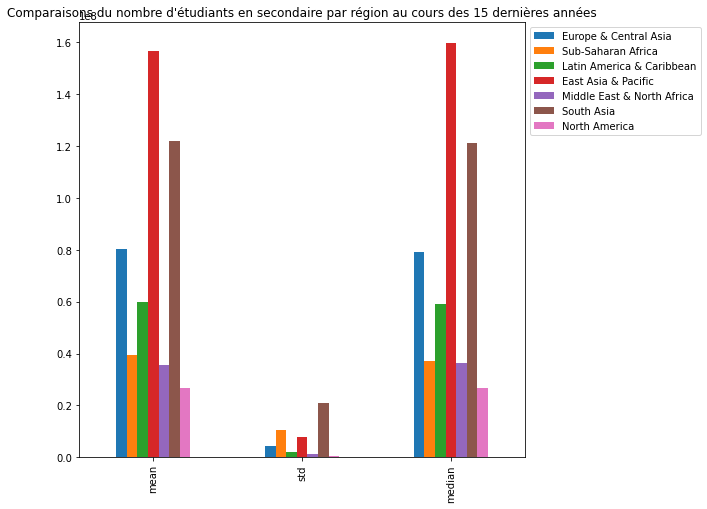

In [445]:
df_stats = pd.DataFrame(stats)

stats_secondary = df_stats.xs('SE.SEC.ENRL', level=1, axis=1)

visual_stats_sec = pd.DataFrame(stats_secondary).plot.bar(figsize=(8, 8))
print(visual_stats_sec)
plt.title("Comparaisons du nombre d'étudiants en secondaire par région au cours des 15 dernières années")
plt.legend(bbox_to_anchor=(1, 1), prop={'size':10})
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


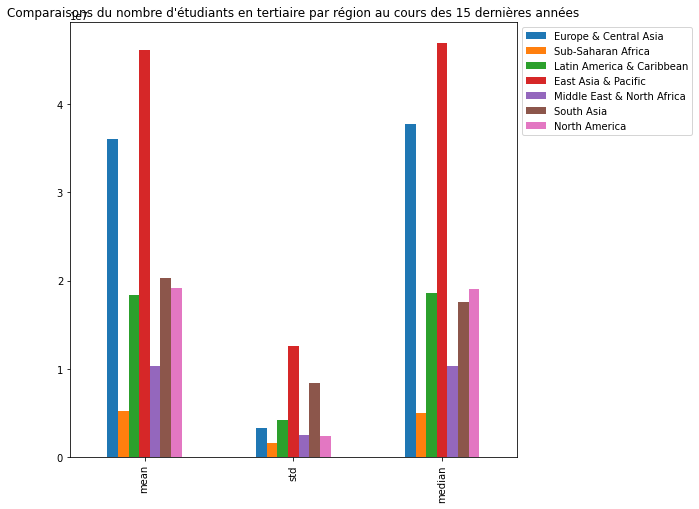

In [446]:
stats_tertiary = df_stats.xs('SE.TER.ENRL', level=1, axis=1)

visual_stats_ter = pd.DataFrame(stats_tertiary).plot.bar(figsize=(8, 8))
print(visual_stats_ter)
plt.title("Comparaisons du nombre d'étudiants en tertiaire par région au cours des 15 dernières années")
plt.legend(bbox_to_anchor=(1, 1), prop={'size':10})
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


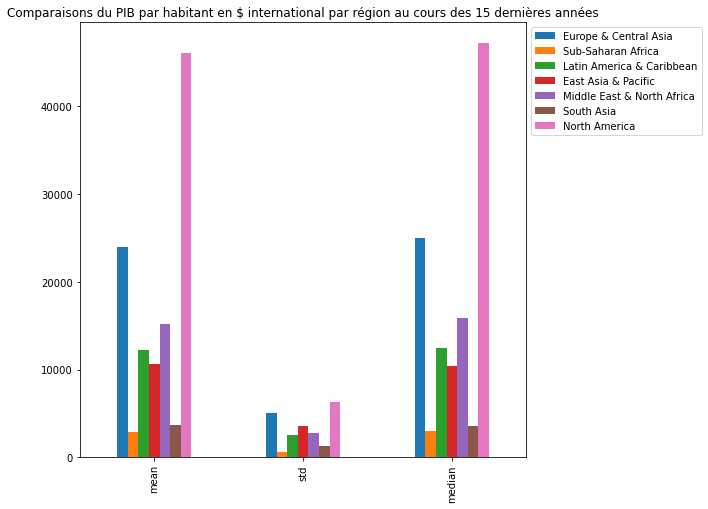

In [447]:
stats_GDP = df_stats.xs('NY.GDP.PCAP.PP.CD', level=1, axis=1)

visual_stats_GDP = pd.DataFrame(stats_GDP).plot.bar(figsize=(8, 8))
print(visual_stats_GDP)
plt.title("Comparaisons du PIB par habitant en $ international par région au cours des 15 dernières années")
plt.legend(bbox_to_anchor=(1, 1), prop={'size':10})
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


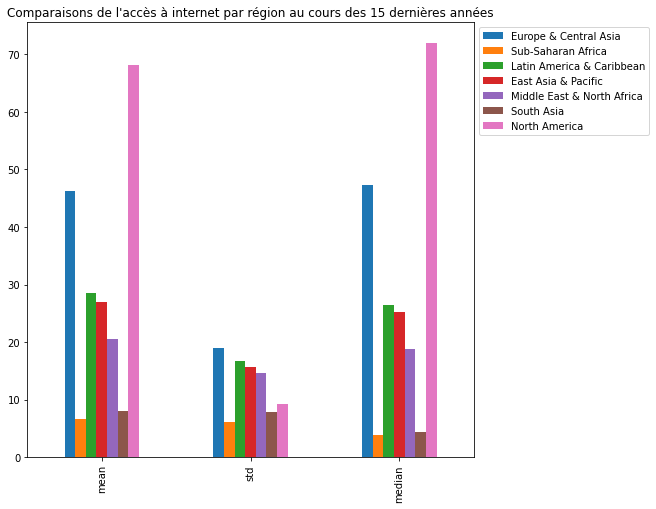

In [448]:
stats_int = df_stats.xs('IT.NET.USER.P2', level=1, axis=1)

visual_stats_int = pd.DataFrame(stats_int).plot.bar(figsize=(8, 8))
print(visual_stats_int)
plt.title("Comparaisons de l'accès à internet par région au cours des 15 dernières années")
plt.legend(bbox_to_anchor=(1, 1), prop={'size':10})
plt.show()

In [426]:
print(l_etudes)
df_stats = pd.DataFrame(stats)
visual_dfs = [pd.DataFrame(df_stats.xs(etude, level=1, axis=1)) for etude in l_etudes]
visual_dfs[1]

['SE.SEC.ENRL', 'SE.TER.ENRL', 'IT.NET.USER.P2', 'NY.GDP.PCAP.PP.CD']


,Europe & Central Asia,Sub-Saharan Africa,Latin America & Caribbean,East Asia & Pacific,Middle East & North Africa,South Asia,North America
mean,3.607999e+07,5.210525e+06,1.839328e+07,4.614493e+07,1.031573e+07,2.033440e+07,1.919762e+07
std,3.289723e+06,1.614966e+06,4.227082e+06,1.256817e+07,2.521365e+06,8.372176e+06,2.401557e+06
median,3.769341e+07,4.993810e+06,1.866002e+07,4.689837e+07,1.029757e+07,1.752964e+07,1.907837e+07


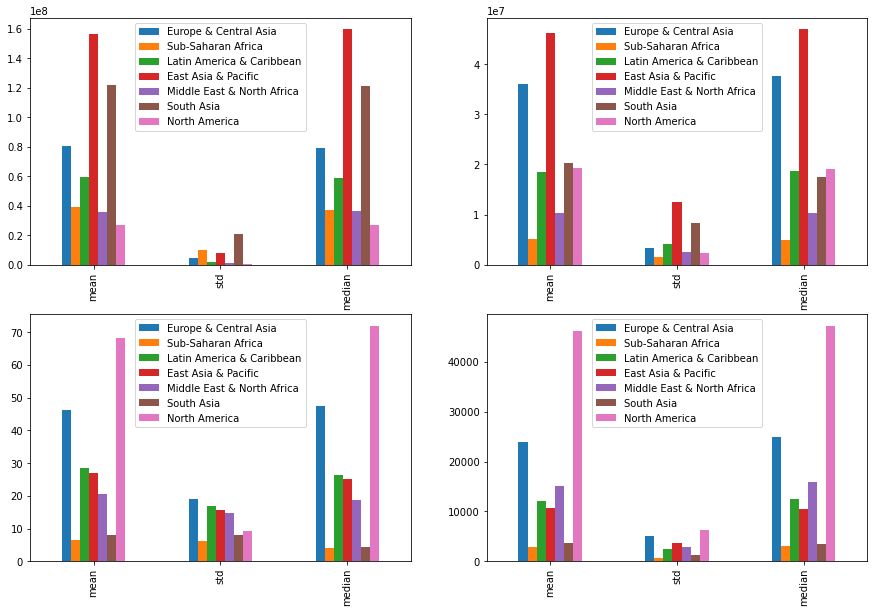

In [433]:
# Source: https://stackoverflow.com/a/56724332/17796234

#define number of rows and columns for subplots
nrow=2
ncol=2

fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        visual_dfs[count].plot(kind='bar', ax=axes[r,c], figsize=(15, 10))
        count+=1

### Indicateur 1 : éducation secondaire

In [226]:
data_secondary = data_clean.loc[data['Indicator Code'] == 'SE.SEC.ENRL']

In [227]:
pd.DataFrame(data_secondary)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2100
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,23327780.0,24269890.0,25103926.0,26749102.0,27787388.0,28104998.0,28306528.0,28494384.0,28935106.0,29572506.0,30134376.0,31299786.0,31811146.0,31250596.0,30972246.0,NaN,NaN,NaN
4856,East Asia & Pacific,EAS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,137120400.0,142236000.0,147389600.0,153615632.0,158087248.0,159636672.0,160846640.0,163689008.0,163093056.0,163384176.0,162608224.0,161644832.0,159734416.0,159612656.0,154212112.0,NaN,NaN,NaN
8521,East Asia & Pacific (excluding high income),EAP,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,120642552.0,126189616.0,131608176.0,138026560.0,142747680.0,144349440.0,145932640.0,148793600.0,148208032.0,148467680.0,147759424.0,146866768.0,144989232.0,144990816.0,139756448.0,NaN,NaN,NaN
12186,Euro area,EMU,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,29301202.0,29430832.0,29486260.0,29425644.0,28677002.0,28862584.0,28685348.0,28328784.0,28182680.0,27921340.0,27990412.0,27887924.0,27713732.0,28224992.0,28055416.0,NaN,NaN,NaN
15851,Europe & Central Asia,ECS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,85580832.0,86736048.0,86941888.0,86484976.0,83494416.0,82032024.0,80432096.0,78970232.0,77410000.0,76399360.0,76057120.0,74917816.0,73753392.0,78725584.0,78143392.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869796,Virgin Islands (U.S.),VIR,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873461,West Bank and Gaza,PSE,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,477378.0,510214.0,544935.0,582736.0,628495.0,656797.0,685585.0,701715.0,707892.0,713921.0,710936.0,705627.0,705443.0,706330.0,709226.0,721414.0,NaN,NaN
877126,"Yemen, Rep.",YEM,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,NaN,1249016.0,NaN,1373362.0,1446369.0,1455206.0,NaN,NaN,1479157.0,NaN,1561337.0,1643116.0,1674950.0,1768102.0,NaN,NaN,NaN,NaN
880791,Zambia,ZMB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#data_secondary['2016'].value_counts(normalize=True).plot(kind='pie')
#plt.axis('equal')
#plt.show()

In [356]:
pd.DataFrame(data_clean)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,NaN


In [63]:
data_clean.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822
2006              746618
2007              749658
2008              752543
2009              744822
2010              644488
2011              740918
2012              739666
2013              749421
2014              773141
2015              755872
2016              870470
2017              886787
2020              835494
2025              835494
2030              835494
2035              835494
2040              835494
2045              835494
2100              835494
dtype: int64

2015 est l'année la plus récente avec le moins de valeurs manquantes, donc on va se servir de 2015 pour nos calculs 🧮 

In [64]:
data_secondary.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
count,1.740000e+02,1.760000e+02,1.750000e+02,1.710000e+02,1.830000e+02,1.830000e+02,1.740000e+02,1.820000e+02,1.790000e+02,1.780000e+02,1.760000e+02,1.810000e+02,1.750000e+02,1.660000e+02,1.660000e+02,1.290000e+02,8.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.693076e+07,1.719332e+07,1.799014e+07,1.899403e+07,1.765569e+07,1.789822e+07,1.948545e+07,1.909951e+07,1.969091e+07,2.001989e+07,2.054347e+07,2.036363e+07,2.127023e+07,2.286852e+07,2.276897e+07,1.578107e+07,1.678644e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.722142e+07,5.850887e+07,6.051476e+07,6.299593e+07,6.220006e+07,6.315724e+07,6.575449e+07,6.552077e+07,6.705074e+07,6.766090e+07,6.942381e+07,6.971135e+07,7.171204e+07,7.475964e+07,7.525414e+07,7.122383e+07,1.533353e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.620000e+02,6.360000e+02,5.730000e+02,6.450000e+02,5.080000e+02,6.000000e+02,8.150000e+02,6.890000e+02,8.160000e+02,1.657000e+03,2.029000e+03,1.923000e+03,9.450000e+02,1.672000e+03,1.028000e+03,1.289000e+03,1.351000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.239065e+05,1.120785e+05,1.228690e+05,1.276705e+05,1.234690e+05,1.387710e+05,2.196672e+05,1.988998e+05,1.755125e+05,1.685098e+05,1.845870e+05,2.376430e+05,1.688400e+05,2.716589e+05,1.899402e+05,1.293140e+05,5.177100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.664520e+05,5.050480e+05,6.084200e+05,6.710490e+05,6.284950e+05,6.514530e+05,6.920145e+05,6.930965e+05,6.917010e+05,7.125765e+05,7.229480e+05,7.235230e+05,7.278950e+05,8.756850e+05,7.681800e+05,5.999470e+05,1.822722e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.926382e+06,3.998498e+06,4.252000e+06,4.676188e+06,4.295869e+06,4.170028e+06,4.531186e+06,4.586818e+06,4.623132e+06,4.748898e+06,4.642220e+06,4.630305e+06,4.846538e+06,5.902519e+06,5.122722e+06,1.942230e+06,2.703206e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.526660e+08,4.641885e+08,4.776638e+08,4.908353e+08,5.009536e+08,5.086493e+08,5.145628e+08,5.228764e+08,5.309246e+08,5.347095e+08,5.451194e+08,5.540751e+08,5.610677e+08,5.724996e+08,5.787665e+08,5.792067e+08,3.908744e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La fontion describe() de Pandas exclus les string et les NaN, pas besoin de lui donner des paramètres supplémentaires. En comparant toutes les années, les années après 2015 inclus semblent être des outsiders, donc finalement nous allons choisir l'année 2014 comme année de référence

Interprétation :
Pour l'année 2014, la moyenne du nombre de personnes suivant une éducation niveau secondaire est de environ 22 768 970 par pays. Pourtant le 3ème quartil (75%) est de 51227220. Cela veut dire que peu de pays ont un nombre d'élèves très élevés. Ce sont ces pays qui nous intéressent, donc nous allons selectionner les pays avec une valeur supérieur à la moyenne.

Mais en cherchant les valeurs suppérieur à la moyenne on ne tombe que sur des régions ou continants (à part la chine et l'inde) Le pays avec la plus grande valeur est l'inde avec 129542056, ça sera donc notre nouvelle valeur maximum.

Cependant de cette manière nous n'obtenons que 4 pays candidats. Pour pouvoir mieux effectuer nos analyses il en faudrait plus donc nous allons baisser la valeur minimum à 5 000 000 (valeur arbitraire permettant d'afficher plus de candidats)

In [65]:
data_secondary_sup = data_secondary.loc[(data_secondary['2014']>5000000) &((data_secondary['2014'] < 129542056))]
pd.DataFrame(data_secondary_sup)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,23327780.0,24269890.0,25103926.0,26749102.0,27787388.0,28104998.0,28306528.0,28494384.0,28935106.0,29572506.0,30134376.0,31299786.0,31811146.0,31250596.0,30972246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12186,Euro area,EMU,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,29301202.0,29430832.0,29486260.0,29425644.0,28677002.0,28862584.0,28685348.0,28328784.0,28182680.0,27921340.0,27990412.0,27887924.0,27713732.0,28224992.0,28055416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15851,Europe & Central Asia,ECS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,85580832.0,86736048.0,86941888.0,86484976.0,83494416.0,82032024.0,80432096.0,78970232.0,77410000.0,76399360.0,76057120.0,74917816.0,73753392.0,78725584.0,78143392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19516,Europe & Central Asia (excluding high income),ECA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,42323176.0,43239880.0,43273840.0,42880240.0,41152348.0,39446812.0,38544780.0,37608244.0,36287684.0,35638060.0,35271832.0,34957624.0,34299404.0,36687988.0,36413404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23181,European Union,EUU,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,45255540.0,45512768.0,45686356.0,45582608.0,44236960.0,44379728.0,43560760.0,42931352.0,42619828.0,42143960.0,42089720.0,41205616.0,40618176.0,43150712.0,42786516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26846,Heavily indebted poor countries (HIPC),HPC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,14344352.0,15483090.0,16650501.0,17799854.0,19312408.0,20891564.0,22804636.0,24819860.0,27264720.0,29579012.0,31989146.0,33907316.0,35730184.0,37292204.0,38850524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30511,High income,HIC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,90478688.0,90969096.0,91295624.0,92014368.0,91064480.0,91676272.0,90885144.0,90685112.0,90496552.0,90055184.0,89714824.0,88886376.0,88515984.0,91177792.0,90703680.0,90009712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34176,Latin America & Caribbean,LCN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,57113116.0,57168124.0,58307856.0,56997856.0,58434628.0,58898668.0,59208296.0,59076008.0,59934848.0,60597392.0,61178508.0,61381448.0,61383376.0,64333296.0,64141980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37841,Latin America & Caribbean (excluding high income),LAC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,54898736.0,54889084.0,55966464.0,54589964.0,55998252.0,56446640.0,56757080.0,56680300.0,57581520.0,58303912.0,58909772.0,59158772.0,59213388.0,62035584.0,61868840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41506,Least developed countries: UN classification,LDC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,26667082.0,28358770.0,30229636.0,31526308.0,32723140.0,34179120.0,36390816.0,38080152.0,40391744.0,43460656.0,46315892.0,48761988.0,51323560.0,54022648.0,55732712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On trie le DataFrame par ordre décroissant en fonction de l'année 2014. Ainsi on peut mettre en avant les meilleurs résultats et les comparer avec les 3 autres paramètres.

In [66]:
pd.DataFrame(data_secondary_sup.sort_values(by=['2014'], ascending=False))

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
415336,India,IND,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,71030512.0,72392728.0,76215688.0,81050128.0,84569080.0,89461792.0,91529432.0,96049056.0,101783936.0,101110384.0,107686864.0,113727864.0,119148200.0,119400528.0,129438992.0,129542056.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70826,OECD members,OED,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,100035792.0,101411184.0,102143760.0,103217928.0,102038936.0,102453480.0,102153576.0,102190760.0,102119768.0,102001368.0,102264192.0,101980024.0,101576664.0,107318792.0,107619152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30511,High income,HIC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,90478688.0,90969096.0,91295624.0,92014368.0,91064480.0,91676272.0,90885144.0,90685112.0,90496552.0,90055184.0,89714824.0,88886376.0,88515984.0,91177792.0,90703680.0,90009712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243081,China,CHN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,81487960.0,86516712.0,90722792.0,95624760.0,NaN,NaN,101195120.0,101830968.0,101448264.0,100392464.0,99218080.0,97452464.0,95004208.0,94324416.0,88691792.0,86127200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15851,Europe & Central Asia,ECS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,85580832.0,86736048.0,86941888.0,86484976.0,83494416.0,82032024.0,80432096.0,78970232.0,77410000.0,76399360.0,76057120.0,74917816.0,73753392.0,78725584.0,78143392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34176,Latin America & Caribbean,LCN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,57113116.0,57168124.0,58307856.0,56997856.0,58434628.0,58898668.0,59208296.0,59076008.0,59934848.0,60597392.0,61178508.0,61381448.0,61383376.0,64333296.0,64141980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37841,Latin America & Caribbean (excluding high income),LAC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,54898736.0,54889084.0,55966464.0,54589964.0,55998252.0,56446640.0,56757080.0,56680300.0,57581520.0,58303912.0,58909772.0,59158772.0,59213388.0,62035584.0,61868840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78156,Sub-Saharan Africa,SSF,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,24165440.0,26017360.0,27721644.0,29495942.0,31802562.0,33568676.0,35506424.0,37222620.0,40435968.0,43603096.0,47275840.0,49775604.0,52071436.0,54104252.0,56136952.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81821,Sub-Saharan Africa (excluding high income),SSA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,24157160.0,26009344.0,27713818.0,29487806.0,31794600.0,33560176.0,35498048.0,37214392.0,40428056.0,43595272.0,47268284.0,49768048.0,52063656.0,54097340.0,56130096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41506,Least developed countries: UN classification,LDC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,26667082.0,28358770.0,30229636.0,31526308.0,32723140.0,34179120.0,36390816.0,38080152.0,40391744.0,43460656.0,46315892.0,48761988.0,51323560.0,54022648.0,55732712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#data_secondary_sup['2014'].value_counts(normalize=True).plot(kind='pie')
#plt.axis('equal')
#plt.show()

In [68]:
#data_secondary_sup['2014'].value_counts(normalize=True).plot(kind='bar')
#plt.show()

In [69]:
print("Il y a ",len(data_secondary_sup.columns)," colonnes et", len(data_secondary_sup.index),"lignes dans le dataFrame data_secondary_sup")

Il y a  29  colonnes et 34 lignes dans le dataFrame data_secondary_sup


### Indicateur 2 : education tertiaire

In [70]:
data_tertiary = data_clean.loc[data['Indicator Code'] == 'SE.TER.ENRL']

In [71]:
pd.DataFrame(data_tertiary)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5089853.5,5400639.0,5798696.5,5955514.0,6465715.0,6899156.0,7214648.0,7588664.0,8006891.5,8382284.5,8715273.0,8594488.0,9147083.0,9688632.0,9966484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4869,East Asia & Pacific,EAS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,25257460.0,27801408.0,31201856.0,34750952.0,38188188.0,41180440.0,44216108.0,46898368.0,49295048.0,52677596.0,55233632.0,56584732.0,58874208.0,60916176.0,69097800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8534,East Asia & Pacific (excluding high income),EAP,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,17104038.0,19489290.0,22648246.0,26147178.0,29489594.0,32467124.0,35446044.0,38087292.0,40322692.0,43633464.0,46071632.0,47217144.0,49461576.0,51471764.0,59809028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12199,Euro area,EMU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,10655828.0,10924430.0,11123054.0,11478988.0,11798734.0,12023159.0,12157298.0,12200163.0,12297050.0,12437282.0,12690334.0,12915013.0,12916244.0,12884160.0,13041961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15864,Europe & Central Asia,ECS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,28481986.0,30305528.0,32152828.0,34013540.0,34920392.0,36152180.0,37193784.0,37857796.0,38290256.0,38756064.0,39231380.0,39164832.0,38685980.0,38299848.0,37693412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869809,Virgin Islands (U.S.),VIR,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873474,West Bank and Gaza,PSE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,71207.0,80543.0,88930.0,104567.0,121928.0,138139.0,150128.0,169373.0,180905.0,182565.0,196625.0,213973.0,217502.0,213217.0,213935.0,221018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877139,"Yemen, Rep.",YEM,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,193426.0,193290.0,192071.0,199813.0,200853.0,236972.0,251187.0,274827.0,272130.0,267498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880804,Zambia,ZMB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55759.0,56680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
data_tertiary.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
count,1.490000e+02,1.480000e+02,1.580000e+02,1.590000e+02,1.590000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.590000e+02,1.620000e+02,1.650000e+02,1.670000e+02,1.660000e+02,1.560000e+02,1.490000e+02,1.160000e+02,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.227315e+06,4.599299e+06,4.726303e+06,5.056495e+06,5.360989e+06,5.834058e+06,6.133992e+06,6.505055e+06,6.686821e+06,6.899924e+06,7.068404e+06,7.414361e+06,7.692306e+06,8.285689e+06,9.178861e+06,6.492164e+06,197838.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.241871e+07,1.339190e+07,1.427191e+07,1.536625e+07,1.633084e+07,1.751348e+07,1.860459e+07,1.974951e+07,2.063824e+07,2.152705e+07,2.251238e+07,2.358939e+07,2.446408e+07,2.553281e+07,2.783755e+07,2.689456e+07,210245.804130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.900000e+02,4.530000e+02,2.670000e+02,7.300000e+01,3.310000e+02,3.420000e+02,4.010000e+02,6.260000e+02,2.000000e+00,7.040000e+02,5.000000e+00,1.890000e+02,1.000000e+02,2.380000e+02,1.780000e+02,1.940000e+02,20280.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.241500e+04,2.741025e+04,3.194625e+04,3.698950e+04,4.254550e+04,4.870325e+04,4.894050e+04,6.937800e+04,7.181250e+04,8.277325e+04,7.444400e+04,9.125750e+04,9.117925e+04,1.127112e+05,1.209230e+05,1.022190e+05,66778.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.820120e+05,2.007930e+05,1.966340e+05,2.123950e+05,2.171300e+05,2.389460e+05,2.345745e+05,2.410150e+05,2.526150e+05,2.649545e+05,2.486390e+05,2.674980e+05,2.731990e+05,3.047020e+05,3.497560e+05,2.638750e+05,94728.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.770002e+06,1.971002e+06,1.893251e+06,2.001345e+06,2.080587e+06,2.172106e+06,2.302591e+06,2.362972e+06,2.379770e+06,2.408179e+06,2.245097e+06,2.252846e+06,2.299963e+06,2.550238e+06,2.912204e+06,8.238405e+05,256385.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.971834e+07,1.067139e+08,1.168016e+08,1.253129e+08,1.324340e+08,1.392713e+08,1.469249e+08,1.552770e+08,1.641394e+08,1.721631e+08,1.814247e+08,1.910539e+08,1.969203e+08,1.989615e+08,2.107300e+08,2.126700e+08,623534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interprétation :
Pour l'année 2014, la moyenne du nombre de personnes suivant une éducation niveau tertiarie est de environ 9 178 861 par pays. Pourtant le 3ème quartil (75%) est de 2 912 204. Cela veut dire que peu de pays ont un nombre d'élèves très élevés. Ce sont ces pays qui nous intéressent, donc nous allons selectionner les pays avec une valeur supérieur à la moyenne.

Mais en cherchant les valeurs suppérieur à la moyenne on ne tombe que sur des régions ou continants (à part la chine et l'inde) Le pays avec la plus grande valeur est la Chine avec 41924200, ça sera donc notre nouvelle valeur maximum.

Cependant de cette manière nous n'obtenons que 4 pays candidats. Pour pouvoir mieux effectuer nos analyses il en faudrait plus donc nous allons baisser la valeur minimum à 2 500 000 (valeur arbitraire permettant d'afficher plus de candidats)

In [73]:
data_tertiary_sup = data_tertiary.loc[((data_tertiary['2014']>2500000)) &((data_tertiary['2014'] < 41924200))]
pd.DataFrame(data_tertiary_sup)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5.089854e+06,5.400639e+06,5798696.50,5955514.00,6.465715e+06,6.899156e+06,7214648.00,7588664.0,8006891.50,8382284.50,8715273.00,8594488.00,9147083.00,9688632.00,9966484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12199,Euro area,EMU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.065583e+07,1.092443e+07,11123054.00,11478988.00,1.179873e+07,1.202316e+07,12157298.00,12200163.0,12297050.00,12437282.00,12690334.00,12915013.00,12916244.00,12884160.00,13041961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15864,Europe & Central Asia,ECS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.848199e+07,3.030553e+07,32152828.00,34013540.00,3.492039e+07,3.615218e+07,37193784.00,37857796.0,38290256.00,38756064.00,39231380.00,39164832.00,38685980.00,38299848.00,37693412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19529,Europe & Central Asia (excluding high income),ECA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.267449e+07,1.393462e+07,15179277.00,16443369.00,1.689741e+07,1.773631e+07,18561374.00,19128692.0,19463992.00,19679412.00,19756732.00,19473514.00,19043116.00,18906682.00,18188350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23194,European Union,EUU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.616708e+07,1.679172e+07,17411080.00,18040184.00,1.851877e+07,1.897145e+07,19282392.00,19477520.0,19700860.00,19985686.00,20276534.00,20349246.00,20116176.00,19751420.00,19804594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26859,Heavily indebted poor countries (HIPC),HPC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.486054e+06,1.671108e+06,1846327.25,2019329.25,2.228999e+06,2.440186e+06,2681653.50,2902472.5,3251272.00,3662948.75,4127698.25,4386884.00,4744576.50,5057360.50,5322084.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34189,Latin America & Caribbean,LCN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.154022e+07,1.237319e+07,13389847.00,14317194.00,1.515910e+07,1.612791e+07,17381520.00,18660016.0,20283368.00,20924170.00,21823096.00,22653000.00,23299522.00,23879564.00,24087544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37854,Latin America & Caribbean (excluding high income),LAC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.074875e+07,1.154407e+07,12519860.00,13399482.00,1.422228e+07,1.510165e+07,16355575.00,17498044.0,19048844.00,19609986.00,20383552.00,21137276.00,21724602.00,22254834.00,22433280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41519,Least developed countries: UN classification,LDC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.328378e+06,2.711024e+06,2854854.75,3049963.25,3.183955e+06,3.520748e+06,3935956.50,4329940.0,4896996.50,5688510.50,6453329.50,7040936.50,7444660.00,7777624.50,7993880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48849,Low income,LIC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.248887e+06,1.372446e+06,1512695.50,1669400.50,1.817193e+06,1.983748e+06,2149382.75,2363024.5,2620479.75,2971608.75,3413509.00,3707753.25,3986678.75,4164292.75,4388009.5,4447326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
print("Il y a ",len(data_tertiary_sup.columns)," colonnes et", len(data_tertiary_sup.index),"lignes dans le dataFrame data_tertiary_sup")

Il y a  29  colonnes et 31 lignes dans le dataFrame data_tertiary_sup


On trie le DataFrame par ordre décroissant en fonction de l'année 2014. Ainsi on peut mettre en avant les meilleurs résultats et les comparer avec les 3 autres paramètres.

In [75]:
pd.DataFrame(data_tertiary_sup.sort_values(by=['2014'], ascending=False))

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
15864,Europe & Central Asia,ECS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.848199e+07,3.030553e+07,32152828.00,34013540.00,3.492039e+07,3.615218e+07,37193784.00,37857796.0,38290256.00,38756064.00,39231380.00,39164832.00,38685980.00,38299848.00,37693412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74504,South Asia,SAS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.075738e+07,1.138136e+07,12150384.00,12931246.00,1.358834e+07,1.392885e+07,15219501.00,17529640.0,20098528.00,21954234.00,24678302.00,30969214.00,33283530.00,33133510.00,33412020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415349,India,IND,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,9.404460e+06,9.834046e+06,10576653.00,11295041.00,1.185294e+07,1.177730e+07,12852684.00,14862962.0,17211216.00,18500324.00,20740740.00,26650952.00,28568408.00,28175136.00,30305848.0,32107420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34189,Latin America & Caribbean,LCN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.154022e+07,1.237319e+07,13389847.00,14317194.00,1.515910e+07,1.612791e+07,17381520.00,18660016.0,20283368.00,20924170.00,21823096.00,22653000.00,23299522.00,23879564.00,24087544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37854,Latin America & Caribbean (excluding high income),LAC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.074875e+07,1.154407e+07,12519860.00,13399482.00,1.422228e+07,1.510165e+07,16355575.00,17498044.0,19048844.00,19609986.00,20383552.00,21137276.00,21724602.00,22254834.00,22433280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67174,North America,NAC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.441597e+07,1.482400e+07,17173894.00,17875092.00,1.818007e+07,1.856590e+07,18792044.00,19078368.0,19583180.00,20453688.00,21791482.00,22388682.00,22376048.00,21369160.00,21096660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23194,European Union,EUU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.616708e+07,1.679172e+07,17411080.00,18040184.00,1.851877e+07,1.897145e+07,19282392.00,19477520.0,19700860.00,19985686.00,20276534.00,20349246.00,20116176.00,19751420.00,19804594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847819,United States,USA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.320288e+07,1.359558e+07,15927987.00,16611711.00,1.690047e+07,1.727204e+07,17487476.00,17758870.0,18248124.00,19102814.00,20427708.00,21016126.00,20994112.00,19972624.00,19700220.0,19531728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19529,Europe & Central Asia (excluding high income),ECA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.267449e+07,1.393462e+07,15179277.00,16443369.00,1.689741e+07,1.773631e+07,18561374.00,19128692.0,19463992.00,19679412.00,19756732.00,19473514.00,19043116.00,18906682.00,18188350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56179,Middle East & North Africa,MEA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,6.546920e+06,6.988851e+06,7375483.00,7694377.50,8.381252e+06,8.950445e+06,9478354.00,10297572.0,11220022.00,11547454.00,12312381.00,12516851.00,13342759.00,13751028.00,14332233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Indicateur 3 : Accès à internet (%)

In [76]:
data_internet = data_clean.loc[data['Indicator Code'] == 'IT.NET.USER.P2']

In [77]:
pd.DataFrame(data_internet)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,1.139541,1.561288,2.693061,3.645881,7.006812,8.393142,11.654648,14.205902,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,5.592680,7.252166,8.993588,10.547244,12.596964,14.666359,16.617828,20.766523,25.253566,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,49.787924,52.796321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,1.897116,2.779090,4.404990,5.762102,6.885265,8.319143,10.173972,14.382694,19.260138,23.769242,28.957572,32.385761,36.068349,39.708933,42.062234,45.210103,48.386621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12370,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,22.524339,27.351403,35.191466,42.096423,47.484586,51.260509,54.936501,61.383050,64.843610,67.129830,71.036722,72.001164,74.092136,75.821560,77.002322,78.666346,80.446726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16035,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,13.184147,16.405569,23.057519,28.363374,32.359086,35.226932,38.083487,43.674382,47.359045,50.566038,56.119117,58.834630,63.486253,66.306669,68.944351,71.162003,73.914751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869980,Virgin Islands (U.S.),VIR,Internet users (per 100 people),IT.NET.USER.P2,13.815081,18.375766,27.494432,27.429073,27.377009,27.344320,27.332611,27.339336,27.361777,27.396510,31.220000,35.600000,40.547900,45.300000,50.070000,54.839137,59.608316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873645,West Bank and Gaza,PSE,Internet users (per 100 people),IT.NET.USER.P2,1.111306,1.836855,3.100092,4.130616,4.400905,16.005000,18.410000,21.176000,24.358000,32.230000,37.400000,41.080000,43.400000,46.600000,53.670000,57.424192,61.178385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877310,"Yemen, Rep.",YEM,Internet users (per 100 people),IT.NET.USER.P2,0.082500,0.090802,0.518796,0.604734,0.881223,1.048598,1.247824,5.010000,6.890000,9.960000,12.350000,14.905000,17.446500,20.000000,22.550000,24.085409,24.579208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880975,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,0.191072,0.233130,0.477751,0.980483,2.013550,2.851752,4.159913,4.870000,5.550000,6.310000,10.000000,11.500000,13.468200,15.400000,19.000000,21.000000,25.506579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
data_internet.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
count,221.000000,222.000000,224.000000,218.000000,221.000000,223.000000,222.000000,229.000000,228.000000,227.000000,227.000000,229.000000,227.000000,226.000000,223.000000,223.000000,223.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,8.649549,10.635251,13.561592,16.117605,18.553640,20.700393,23.209280,25.415287,28.195001,30.848461,34.011757,36.668502,39.737108,42.519815,45.186792,48.210183,50.842668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.131968,15.327507,18.256975,20.185670,21.576847,22.790847,23.860890,25.004595,25.945170,26.627290,26.981346,27.401617,28.067072,28.406670,28.268045,27.970468,27.984504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.990000,1.083733,1.177119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.473921,0.625089,1.074060,1.657141,2.184376,2.906730,3.778202,4.400000,5.737500,7.045000,8.185000,10.070000,12.540030,15.025000,17.730000,21.805521,25.436440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.210692,2.960811,4.613088,6.608140,8.528818,11.483198,14.135069,16.300000,21.385000,25.487005,29.900000,34.900000,37.000000,41.650000,45.590391,48.940434,53.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.426803,14.207723,19.501213,24.557605,28.177910,34.431464,38.005000,40.790000,46.010000,50.721014,54.520000,57.789979,62.898125,66.230001,69.300000,72.275300,76.005180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,52.000000,64.000000,79.120000,83.140000,83.890000,87.000000,89.510000,90.600000,91.000000,93.000000,93.390000,94.819687,96.209800,96.546800,98.160000,98.323610,98.240016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interprétation :
Pour l'année 2014, la moyenne du nombre de personnes ayant eu accès à intenret au moins une fois tous les 3 mois est de environ 45.18% par pays. Le 3ème quartil (75%) est de 69.3%. Cela veut dire que la différence entre chaque pays est moins grande que pour les deux premiers indicateurs (moyenne proche de 50% et 3ème quartil proche de 75%). Nous allons selectionner les pays avec une valeur supérieur à au 3ème quartil.

In [79]:
data_internet_sup = data_internet.loc[(data_internet['2014']>69)] #&((data_tertiary['2014'] < 41924200))]
pd.DataFrame(data_internet_sup)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
12370,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,22.524339,27.351403,35.191466,42.096423,47.484586,51.260509,54.936501,61.383050,64.843610,67.129830,71.036722,72.001164,74.092136,75.821560,77.002322,78.666346,80.446726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30695,High income,HIC,Internet users (per 100 people),IT.NET.USER.P2,30.689400,36.756791,45.225699,49.933772,55.088364,58.782014,61.473182,66.890396,68.980459,70.190163,72.280414,72.819457,75.525010,76.842757,78.472283,80.014664,81.967715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67345,North America,NAC,Internet users (per 100 people),IT.NET.USER.P2,43.879374,50.162021,59.057197,61.939741,64.874247,68.327875,69.270454,74.823605,74.266503,71.916647,72.540484,71.042550,75.523583,72.830288,74.404815,75.941036,77.540410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.040000,78.530000,81.000000,81.000000,86.434425,94.000000,95.900000,96.910000,97.930637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125985,Aruba,ABW,Internet users (per 100 people),IT.NET.USER.P2,15.442823,17.100000,18.800000,20.800000,23.000000,25.400000,28.000000,30.900000,52.000000,58.000000,62.000000,69.000000,74.000000,78.900000,83.780000,88.661227,93.542454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129650,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,46.756116,52.689266,NaN,NaN,NaN,63.000000,66.000000,69.450000,71.670000,74.250000,76.000000,79.487698,79.000000,83.453497,84.000000,84.560519,88.238658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133315,Austria,AUT,Internet users (per 100 people),IT.NET.USER.P2,33.730133,39.185450,36.560000,42.700000,54.280000,58.000000,63.600000,69.370000,72.870000,73.450000,75.170000,78.739993,80.029994,80.618800,80.995825,83.940142,84.323331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136980,Azerbaijan,AZE,Internet users (per 100 people),IT.NET.USER.P2,0.147758,0.305565,4.999714,NaN,NaN,8.030375,11.992177,14.540000,17.080000,27.400000,46.000000,50.000000,54.200000,73.000001,75.000016,77.000000,78.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140645,"Bahamas, The",BHS,Internet users (per 100 people),IT.NET.USER.P2,8.000000,11.800000,18.000000,20.000000,22.000000,25.000000,26.000000,27.000000,31.540000,33.880000,43.000000,65.000000,71.748203,72.000000,76.920000,78.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144310,Bahrain,BHR,Internet users (per 100 people),IT.NET.USER.P2,6.153733,15.038634,18.050721,21.554945,21.458681,21.303734,28.243952,32.910000,51.950000,53.000000,55.000000,76.999966,88.000000,90.000040,90.503133,93.478301,97.999981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
print("Il y a ",len(data_internet_sup.columns)," colonnes et", len(data_internet_sup.index),"lignes dans le dataFrame data_internet_sup")

Il y a  29  colonnes et 57 lignes dans le dataFrame data_internet_sup


On trie le DataFrame par ordre décroissant en fonction de l'année 2014. Ainsi on peut mettre en avant les meilleurs résultats et les comparer avec les 3 autres paramètres.

In [81]:
pd.DataFrame(data_internet_sup.sort_values(by=['2014'], ascending=False))

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
411855,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,44.470534,49.392995,79.120000,83.140000,83.880000,87.000000,89.510000,90.600000,91.000000,93.000000,93.390000,94.819687,96.209800,96.546800,98.160000,98.200000,98.240016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169965,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,42.949860,47.509700,52.031597,56.522012,60.990867,65.447066,69.899655,74.350594,82.300000,83.250000,84.210000,88.336000,91.299305,95.300000,96.800000,98.323610,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628090,Norway,NOR,Internet users (per 100 people),IT.NET.USER.P2,52.000000,64.000000,72.840000,78.130000,77.690000,81.990000,82.550000,86.930000,90.570000,92.080000,93.390000,93.489983,94.649978,95.053400,96.300000,96.810300,97.298204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287245,Denmark,DNK,Internet users (per 100 people),IT.NET.USER.P2,39.172431,42.957525,64.250000,76.260000,80.930000,82.740000,86.650000,85.030000,85.020000,86.840000,88.720000,89.810013,92.260012,94.629700,95.990000,96.330500,96.967785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.040000,78.530000,81.000000,81.000000,86.434425,94.000000,95.900000,96.910000,97.930637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507145,Liechtenstein,LIE,Internet users (per 100 people),IT.NET.USER.P2,36.515230,45.116853,59.470711,58.809692,64.007448,63.371356,64.214161,65.080218,70.000000,75.000000,80.000000,85.000000,89.407700,93.800000,95.210000,96.641195,98.093904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514475,Luxembourg,LUX,Internet users (per 100 people),IT.NET.USER.P2,22.887328,36.163423,39.840000,54.550000,65.880000,70.000000,72.510000,78.920000,82.230000,87.310000,90.620000,90.029859,91.949924,93.776500,94.670000,97.334100,97.493930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327560,Faroe Islands,FRO,Internet users (per 100 people),IT.NET.USER.P2,32.916392,43.246984,53.299222,58.912641,66.533599,67.902632,69.359445,75.980000,75.570000,75.180000,75.200000,80.732173,85.335189,90.000000,93.300000,94.200000,95.108682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778355,Sweden,SWE,Internet users (per 100 people),IT.NET.USER.P2,45.687652,51.765665,70.570000,79.130000,83.890000,84.830000,87.760000,82.010000,90.000000,91.000000,90.000000,92.769986,93.179988,94.783600,92.520000,90.610200,91.506828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569450,Monaco,MCO,Internet users (per 100 people),IT.NET.USER.P2,42.184863,46.646142,48.047117,49.491169,52.490197,55.464826,61.476040,64.377682,67.250000,70.100000,75.000000,80.300000,87.000000,90.700000,92.400000,93.363302,95.208178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Indicateur 4 :  Le PIB par habitant en $ international

In [82]:
data_GDP = data_clean.loc[data['Indicator Code'] == 'NY.GDP.PCAP.PP.CD']

In [83]:
pd.DataFrame(data_GDP)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
1247,Arab World,ARB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,9090.646944,9327.193615,9393.421050,9698.659996,10669.804879,11404.718837,12281.110832,13004.360149,13738.913412,13850.562100,14444.665884,14825.909580,15716.140656,16052.546530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4912,East Asia & Pacific,EAS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,5714.770422,6018.194752,6387.014556,6803.722087,7389.976363,8042.767094,8829.428188,9772.046623,10395.686881,10788.651682,11724.724549,12613.241644,13482.132696,14406.602766,15275.008777,16127.388020,17009.618389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8577,East Asia & Pacific (excluding high income),EAP,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,3292.703805,3552.668338,3849.103030,4224.185005,4680.401531,5243.812212,5921.786397,6753.051869,7392.821286,7941.324527,8746.749009,9594.852212,10423.366960,11262.429123,12139.179320,12990.423856,13878.255428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12242,Euro area,EMU,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,25324.140521,26574.477921,27561.141241,27977.344821,29103.961720,30126.581418,32553.668647,34418.143364,35758.767721,34895.127772,35887.894223,37437.945606,37805.121472,38989.075120,40036.212144,41283.802057,42166.252985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15907,Europe & Central Asia,ECS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,15848.714908,16675.999540,17447.386912,18107.487108,19235.926298,20270.087244,22434.917018,24013.718549,25661.375283,24966.006100,26037.458465,27769.767834,28487.728406,29490.420944,30190.802834,30661.371416,31169.681595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869852,Virgin Islands (U.S.),VIR,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873517,West Bank and Gaza,PSE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877182,"Yemen, Rep.",YEM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,3086.354821,3184.923200,3267.086923,3360.668430,3490.716252,3699.915248,3827.095212,3949.783998,4061.241117,4135.865264,4388.144847,3805.237994,3863.289475,4007.826700,3967.937833,2817.815538,2512.339519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880847,Zambia,ZMB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1666.884356,1746.929533,1804.284491,1916.105741,2051.607433,2210.472268,2392.690039,2589.897156,2768.423449,2961.990560,3212.941881,3361.112069,3574.058520,3701.392674,3826.464402,3869.976869,3940.701882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data_GDP.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
count,211.000000,213.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,215.000000,215.000000,215.000000,217.000000,213.000000,213.000000,207.000000,206.000000,203.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,11239.055416,11575.228145,11894.408118,12386.182675,13278.019217,14015.119428,15166.958972,16133.040151,16704.820683,16249.324844,16849.947975,17821.961109,18166.279563,18794.896004,18981.215168,19294.735039,19510.283029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14065.054060,14359.203898,14689.211207,15194.669344,16263.670480,16805.833792,18068.836761,18855.660331,19159.910636,18201.962647,18942.560047,20087.978191,20467.773947,21104.856258,21387.400627,21096.508631,21190.825330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,419.463914,408.574400,414.722773,433.079475,460.247641,488.388087,513.379691,542.061729,568.083478,569.535006,597.076987,629.856389,664.801780,618.514682,633.918765,668.337622,700.063083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2137.987922,2159.358801,2181.990759,2300.827022,2468.833481,2628.776647,2909.580683,3059.134524,3195.912182,3200.535670,3353.390756,3513.291213,3699.347805,3940.087370,3925.094419,3964.355377,4110.723839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5873.463317,6120.930896,6393.776885,6732.917124,7239.126173,7836.581215,8689.292906,9259.236806,10038.052333,9936.444577,10225.252234,11212.538513,11351.062058,11828.806838,12161.863500,12430.510886,12977.870819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,14575.275788,14360.746164,14556.908125,15476.261740,16539.418934,17819.797356,20135.197735,21755.947594,22913.362541,21054.300678,21599.973974,24074.364581,24657.878980,25655.822952,25565.783640,26618.792890,26271.335527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,85860.611440,87599.296411,91083.791524,90348.993723,100426.546129,97767.190344,108831.252401,111959.861509,115012.450334,113312.852224,122609.410776,129349.916352,127610.208824,140037.115597,137736.949815,127764.462337,127727.965544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
data_GDP_sup = data_GDP.loc[(data_GDP['2014']>25565)] #&((data_tertiary['2014'] < 41924200))]
pd.DataFrame(data_GDP_sup)[:5] #[:5] affiche les 5 meilleurs

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
12242,Euro area,EMU,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,25324.140521,26574.477921,27561.141241,27977.344821,29103.961720,30126.581418,32553.668647,34418.143364,35758.767721,34895.127772,35887.894223,37437.945606,37805.121472,38989.075120,40036.212144,41283.802057,42166.252985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15907,Europe & Central Asia,ECS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,15848.714908,16675.999540,17447.386912,18107.487108,19235.926298,20270.087244,22434.917018,24013.718549,25661.375283,24966.006100,26037.458465,27769.767834,28487.728406,29490.420944,30190.802834,30661.371416,31169.681595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30567,High income,HIC,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,27886.041615,28830.636547,29745.190388,30735.648194,32455.407216,34025.767408,36195.366276,37928.961548,38843.895407,37808.189089,39237.128491,40793.845611,41917.754256,43337.278029,44624.821680,45913.440010,46855.878681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67217,North America,NAC,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,35736.506241,36567.031108,37448.106982,38941.424912,41118.629704,43503.575375,45609.330609,47214.928995,47602.871001,46192.191285,47548.700257,48975.376671,50523.415889,51917.700640,53643.456942,55236.838039,56264.078763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129522,Australia,AUS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,26406.130951,27431.075399,28717.289203,29723.683850,31345.220871,32591.809354,34356.766405,36596.008409,37506.906822,40282.313720,39191.035625,41782.284942,42616.148922,45668.689114,46446.027242,46475.927752,46789.927238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
pd.DataFrame(data_GDP_sup.sort_values(by=['2014'], ascending=False))

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2100
518012,"Macao SAR, China",MAC,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,33469.066891,34408.468743,37145.394382,41266.798067,52457.373337,57162.644221,65307.164464,75131.938348,77584.571332,77553.353163,96198.241003,116752.211556,126863.410010,140037.115597,137736.949815,107245.639439,104343.656456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671942,Qatar,QAT,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,85860.611440,87599.296411,91083.791524,90348.993723,100426.546129,97767.190344,108831.252401,111959.861509,115012.450334,113312.852224,122609.410776,129349.916352,127610.208824,126913.035408,127313.494355,127764.462337,127727.965544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514347,Luxembourg,LUX,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,55306.307355,56023.165324,58771.509273,60035.755473,64096.864482,68220.064482,77996.242775,83948.786548,86693.895122,82362.309453,85779.082403,92005.016836,91622.177417,95590.538698,101876.730017,103732.639291,103556.591156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715922,Singapore,SGP,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,40978.067963,40408.013621,42367.875593,45799.717844,50911.461292,55172.923654,59999.298492,64466.040961,63438.309315,61646.837031,70646.820265,75013.186659,77429.429543,81287.839553,84593.428145,86306.308913,88003.099478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195492,Brunei Darussalam,BRN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,65034.834659,66960.520817,69246.748177,71337.235205,72411.575283,73873.290240,78398.189657,79616.870305,78682.980825,76964.317772,78923.390474,82434.883091,83504.302518,81827.273461,80152.139184,79593.280721,77570.911947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477697,Kuwait,KWT,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,55420.722652,55510.355752,57119.745855,67552.427413,75528.223526,83224.574879,88328.016067,91268.607228,90011.782168,79296.864741,73682.868378,77459.538306,79047.763871,76667.706333,74613.953855,73059.562442,74408.170340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840532,United Arab Emirates,ARE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,81818.620517,80488.689741,79388.010977,82571.360994,85090.282755,82205.945267,81305.374808,74698.274380,68902.199052,59160.001848,56415.074051,58404.015589,60914.803082,64713.131206,67551.002395,70391.220127,72540.205858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627962,Norway,NOR,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,36927.960130,37873.579000,37959.794806,38530.803130,42516.432210,47772.430075,54110.882646,55874.826276,61757.245568,55494.228484,58077.588998,62145.026155,65447.495825,67056.117040,65787.047567,62066.808188,59384.811722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781892,Switzerland,CHE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,35727.068352,36862.443486,37718.304128,37711.128304,39197.681067,40572.263175,45132.358801,49726.803376,52584.734946,51821.973350,53170.278919,56183.832585,57849.583988,60108.516347,61792.294311,63291.538276,63741.452507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690267,San Marino,SMR,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,59984.936735,63955.499527,64327.238793,67263.560461,71351.921010,74436.850938,78675.571239,85480.638792,87503.959453,75930.521859,72368.203628,66053.110503,61392.979304,59764.106294,59643.844975,60145.460932,61051.221606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ------------------------------------------------------------------------------------------------



















## ------------------------------------------------------------------------------------------------

In [ ]:
series.any() #permet de mettre en avant les series avec au moins une valeur fausse

In [53]:
series.all() #permet de mettre en avant les series avec toutes les valeurs fausses

Series Code                            True
Topic                                  True
Indicator Name                         True
Short definition                       True
Long definition                        True
Unit of measure                        True
Periodicity                            True
Base Period                            True
Other notes                            True
Aggregation method                     True
Limitations and exceptions             True
Notes from original source             True
General comments                       True
Source                                 True
Statistical concept and methodology    True
Development relevance                  True
Related source links                   True
Other web links                        True
Related indicators                     True
License Type                           True
Unnamed: 20                            True
dtype: bool

In [54]:
df.groupby #pour mission 4
#df.groupby[].apply(lambda x: operations)

NameError: name 'df' is not defined

In [ ]:
sort